# <div align = center> Projekt-Seminar Deep Learning </div> #
## <div align = center> Deep Reinforcement Learning with Deep Q-Learning </div> ##
<div align = center> A group work from Simon Lausch, Jan Felix Fuchs & Paul Jansen </div> <br>
  
<div align = center> The following notebook contains the code we produced and the information we collected during the Projekt Seminar. <br>
Please note that Tobias Papen is also part of the group. However, as he is investigating a modelbased approach and not Q-learning, he is writing his own notebook. </div>

### 1. Research and project plans ###

At the beginning of this notebook, we will first take a look at the theoretical foundations of machine learning, deep learning as well as deep Q-learning. Afterwards, we will briefly explain our approach before we turn to the actual project.

#### 1.1 Machine Learning ####

Machine learning is a subset of artificial intelligence. Computers are trained to solve a problem as successfully as possible from given data and experience.
Machine learning is basically divided into four learning methods. Depending on the method, different algorithms are used to enable the best possible decision-making based on the test data. With increasing training, the computer becomes more and more accurate in its predictions. By trying to find correlations, similarities or patterns, it becomes possible to make predictions not only on test data, but also on unknown data. Machine Learning is divided into the following four methods:
1. Supervised learning <br>
In supervised learning, the computer is given pairs of inputs and outputs. After the computer has generated an output for a given input, it is compared with the actual output. In this way, with increasing training, the computer recognizes correlations which used for the decision-making processes 
2. Unsupervised learning <br>
Unsupervised learning differs significantly from supervised learning in the fact that there is no output available for the input. Just as with supervised learning, the goal is to recognise correlations with increasing training, but without the step of comparing the determined and the actual.
3. Semi-supervised learning <br>
Semi-supervised learning is located between unsupervised and supervised learning. Here, there are only outputs for some, but not all of the input data. 
4. Reinforcement learning <br>
Within this Projekt-Seminar we are going to deal with a form of q-learning, more precisly deep q-learning. Since this is an algorithm of reinforcement learning we wanna take a look at this a bit close in the next paragraph.

#### 1.2 Reinforcement Learning ####

As a machine learning method, reinforcement learning deals with an agent, the computer, which moves in an environment and can perform actions there. For each action that the agent performs, it determines how that action is rewarded. The respective reward is defined by a reward function. It is important to note that, depending on the environment, it is not necessarily possible to immediately assess whether an executed action had a positive or negative effect - this may only become apparent after some time.
Consequently, there is no input of test data in reinforcement learning. The final decision-making that the agent arrives at is shaped solely by its experience in combination with the associated rewards.

#### 1.3 Q-Learning ####

#### 1.4 Deep Q-Learning ####

#### 1.5 Our approach ####

Considering the timetable of the course, we will divide our project into two major parts. In the first phase of the project, all three of us are going to work on a baseline. For this purpose, we want to set up a first deep q network and create a basis for later comparisons with different approaches. While the first part will be done in group work, we are going to divide our group into the individuals during the second part of the semester. In individual work, each group member will then work on another approach. This approach can be based on the already implemented dqn, but it can also be independent of it. At this stage, the approaches have not been determined yet. More information on the division can be found later in this notebook. In the final presentation, we will then compare our approaches with the previously determined baseline. In addition, we are going to compare them with Tobias' approach.

### 2. Installing and importing all necessary dependencies ###

In order to set up the game we wanted our agent to learn, we had to download and install the following modules via Anaconda. Here is a quick overview over the modules we are using:

| Module | Use/Explanation |
| :-- | :-- |
| gym[atari] | OpenAI Gym is a python library typically used to develop reinforcement algorithms. The library provides numerous enviroments and prepared classes as well as methods in order to simplify the development. More information about OpenAI Gym can be found [here](https://www.gymlibrary.dev). |
| ale_py | ALE (Arcade Learning Environment) is a framework used to simulate Atari games. |
| autorom[accept-rom-license] | This module contains Atari ROM files for ALE in order to load Atari game environments. |
| torch | Pytorch is a free and open-source framework for machine learning. |
| pytorch-cuda | In order to shorten our compute time we are using pytorch in combination with Cuda, an api by Nvida. By using Cuda we can assign the calculation of certain task to the gpu. |

In [ ]:
#pip install gym[atari]
#pip install ale_py
#pip install autorom[accept-rom-license]
#pip install torch
#conda install pytorch-cuda = 11.6

### 3. Our environment ###

#### 3.1 Game principal ####

The Atari game Freeway is similar to well-known games like Frogger or Crossy Road. The player tries to manoeuver a character, or more precisely a chicken, across a busy road without being run over by a car. OpenAI Gym provides several modes as well as difficulties for this game. <br>
In rendered mode, the game is limited to a length of 2 minutes and 30 seconds. It is therefore possible for the player to cross the road several times. Depending on the selected difficulty, the chicken is either put back at the start or thrown back a few pixels if it collides with a car. The number and speed of the cars depends on the used mode.

#### 3.2 Creating our environment ####

By using the function gym.make() we create our environment. We pass the following parameters to the function: 
| Parameter | Example Value | Explanation |
| :--- | :----: | :--- |
| name | "ALE/Freeway-v5" | This is the name of our game. We are using the newest version v5. ALE (Arcade Learning Environment) is a framework used to develop AI agents for Atari games. |
| difficulty | 1 | The game provides two different difficulties. By setting the difficulty to 1, the chicken is moved back to the start after each collision. Using difficulty 0, it is only thrown back a few pixels. |
| mode | 3 | The game provides eight different modes. As the value increases, so does the number and the speed of the cars. |
| obs_type | "rgb" | This argument determines what observations are returned by the environment. We can choose from rgb, grayscale and ram. |
| frameskip | 1 | This argument influences frame skipping (for more information read the paragraph stochasticity) |
| repeat_action_probability | 0 | This argument sets the probability for sticky actions (for more information read the paragraph stochasticity) |
| render_mode | "human" | By setting the render mode to "human" the game will be displayed while its running. During the training of the agent, we are not going to display the game. |

In [15]:
import gym
#Example for the creation of an environment
env = gym.make("ALE/Freeway-v5", difficulty = 1, mode = 3, obs_type = "rgb", frameskip = 1, repeat_action_probability = 0, render_mode = "human")

#### 3.3 Observation space ####

In [33]:
observation_space = env.observation_space
print("If we choose rgb as the observation space our environment returns the following observation: {}".format(observation_space))
print("Since {} is the shape of our observation space, we recieve a 210px * 160px rgb image.".format(observation_space.shape))
print("The image is stored as a three-dimensional array. The dimensions are 210, 160 and 3.")
print("If you want to get an example of an image try printing observation_space.sample().")
print("By using the uint data type (unsinged int using 8 bits) the lowest possible entry is 0 while 255 is the highest possible entry.")
#print(observation_space.sample())

If we choose rgb as the observation space our environment returns the following observation: Box(0, 255, (210, 160), uint8)
Since (210, 160) is the shape of our observation space, we recieve a 210px * 160px rgb image.
The image is stored as a three-dimensional array. The dimensions are 210, 160 and 3.
If you want to get an example of an image try printing observation_space.sample().
By using the uint data type (unsinged int using 8 bits) the lowest possible entry is 0 while 255 is the highest possible entry.


#### 3.4 Action space ####

In [14]:
action_space = env.action_space
print("Number of different possible actions we can choose from: {}".format(action_space))
print("Possible actions with corresponding values:")
print(env.unwrapped.get_action_meanings())
print("[0, 1, 2]")
print("(NOOP stands for no operation which means that the chicken does not move.)")

Number of different possible actions we can choose from: Discrete(3)
Possible actions with corresponding values:
['NOOP', 'UP', 'DOWN']
[0, 1, 2]
(NOOP stands for no operation which means that the chicken does not move.)


#### 3.5 Rewards ####

Without any changes on the environment, there is only one reward. If the chickens crosses the road it recieves a reward with the value one. Except this case, there are no other rewards, neither for colliding with a car, nor for going backwards. In the following sections we will write our own reward function in order to achieve a better learning behaviour of our agent.

#### 3.5 Stochasticity ####

Since Atari games are deterministic, there is a possibility that the agent just memorizes an optimal sequence of actions instead of using the observations and the reward from the environment. Due to this fact ALE uses so called sticky actions. This ensures that with a low probability the previous action is repeated. Therefore, the action chosen by the agent is not executed. By specifing the repeat_action_probality parameter during the creation of the environment, we can influence the probality of these sticky actions.<br>
Additionally, OpenAI Gym implements frame skipping which means that in each step the action is repeated for a random number of frames. By specifing the frameskip parameter during the creation of the environment, we can influece this number of frames. Specifically, the value indicates how often an action is repeated per step. By setting this value to one, we prevent frame skipping.

### 4. First Version: Random choices ###

In this first version the agent chooses a random action from the action space (up, down or no operation). We have chosen the following probabilities:
| Action | Number | Probability |
| :--- | :----: | :---: |
| Standing still | 0 | 3% |
| Moving forwards | 1 | 90% | 
| Moving backwards | 2 | 7% |

Note: For some group members it is the case that the kernel dies when closing the window. If this happens to you, you should either let the game run out or stop the execution of the cell.

In [13]:
import gym
import random
import time

#Creating the environment
env = gym.make("ALE/Freeway-v5", difficulty = 1, mode = 0, obs_type = "grayscale", frameskip = 1, repeat_action_probability = 0, render_mode = "human")

#Resetting the environment
env.reset()
terminated = False

while(not terminated):
    #Choosing a random number between 0 and 1
    rand_number = random.random()

    if(rand_number < 0.9):
        #Moving forwards
        random_action = 1
    elif(rand_number < 0.97):
        #Moving backwards
        random_action = 2
    else:
        #Standing still
        random_action = 0

    #Recieving information
    observation, reward, terminated, truncated, info = env.step(random_action)
    
    #Render the environment
    env.render()

env.close()

[  0   0   0   0   0   0   0   0 142 142 142 142 142 142 142 142 142 142
 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142
 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142
 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142
 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142
 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142
 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142
 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142
 142 142 142 142 142 142 142 142 142 142 142 142 142 157 142 157]
[  0   0   0   0   0   0   0   0 142 142 142 142 142 142 142 142 142 142
 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142
 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142
 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142 142
 142 142 142 142 142 142 142 142 142 142 142 142 142 142 1

KeyboardInterrupt: 

# Vernünftige Reward Funktion finden #

### 5. Changing the reward function ###

Since the game comes with a basic reward function, we are modifing the rewards.

In [2]:
import numpy as np

class ClipReward(gym.RewardWrapper):
    #Method to initialize the updated reward function
    def __init__(self, env, min_reward, max_reward):
        #Inheritance: calling construtor of the super class
        super().__init__(env)

        #Saving the given parameters
        self.pre_pos = 6                                    #previous position of the chicken (lowest value = 6)
        self.min_reward = min_reward                        #minimum reward
        self.max_reward = max_reward                        #maximum reward
        self.reward_range = (min_reward, max_reward)        #range of the reward
        self.target_runs = 0                                #number of target runs

    #Method to calculate the reward
    def reward(self, reward):
        #Recieving the RAM (observation space)
        ram = env.unwrapped.ale.getRAM()
        #Saving the current position and the cooldown value of the chicken
        #The cooldown value is not zero if the chicken got hit, was reset and now needs to wait for a short time
        current_pos = ram[14]
        cooldown = ram[106]

        if(current_pos >= 175): 
            #Chicken reaches the goal
            reward = 100
            self.target_runs += 1
        elif(current_pos > self.pre_pos): 
            #Chicken moves forward
            reward = 3
            #Try 1
        elif(self.pre_pos < 175): 
            #Chicken did not reach the goal yet
            if(current_pos == 6 and self.pre_pos > 6 and (not cooldown == 0)):
                #Chicken collides with a car (reset)
                #By checking the cooldown value we are making sure that the we detect a "false" collision
                #Otherwise the agent would get a negative reward for moving forwards and then immediately backwards)
                reward = -100
                #Try -120
            elif(current_pos < self.pre_pos): 
                #Chicken moves backwards
                reward = -1
                #Try 0
        else:
            #Chicken does not move
            reward = np.floor(-1000/current_pos)
            #Try 0
        #Getting new previous position
        self.pre_pos = current_pos
        #Returning reward
        return np.clip(reward, self.min_reward, self.max_reward)

    #Method to recieve the number target runs
    def get_TargetRuns(self):
        return self.target_runs

    #Method to reset the number of target runs
    def reset_TargetRuns(self):
        self.target_runs = 0

In [18]:
import numpy as np

class ClipReward(gym.RewardWrapper):
    #Method to initialize the updated reward function
    def __init__(self, env, min_reward, max_reward):
        #Inheritance: calling construtor of the super class
        super().__init__(env)

        #Saving the given parameters
        self.pre_pos = 6                                    #previous position of the chicken (lowest value = 6)
        self.min_reward = min_reward                        #minimum reward
        self.max_reward = max_reward                        #maximum reward
        self.reward_range = (min_reward, max_reward)        #range of the reward
        self.target_runs = 0                                #number of target runs

    #Method to calculate the reward
    def reward(self, reward):
        #Recieving the RAM (observation space)
        ram = env.unwrapped.ale.getRAM()
        #Saving the current position and the cooldown value of the chicken
        #The cooldown value is not zero if the chicken got hit, was reset and now needs to wait for a short time
        current_pos = ram[14]
        cooldown = ram[106]

        if(current_pos >= 175): 
            #Chicken reaches the goal
            reward = 10000
            self.target_runs += 1
        elif(self.pre_pos > 6 and (not cooldown == 0)):
            #Chicken collides with a car (reset)
            #By checking the cooldown value we are making sure that the we detect a "false" collision
            #Otherwise the agent would get a negative reward for moving forwards and then immediately backwards)
            reward = -1000
            #Try -120
        #Chicken recieves a reward connected to its current position on the road (independent from crash or goal)
        reward += current_pos - (500 / current_pos)
        
        #Getting new previous position
        self.pre_pos = current_pos
        #Returning reward
        return np.clip(reward, self.min_reward, self.max_reward)

    #Method to recieve the number target runs
    def get_TargetRuns(self):
        return self.target_runs

    #Method to reset the number of target runs
    def reset_TargetRuns(self):
        self.target_runs = 0


In [3]:
class LinearReward(gym.RewardWrapper):
    def __init__(self, env):
        super().__init__(env)
        self.target_runs = 0  

    def reward(self, reward):
        ram = env.unwrapped.ale.getRAM()
        reward = 0
        if 140 <= ram[106] <= 141:
            reward += 10000
            self.target_runs += 1
        reward += (ram[14] * 1.5) - 90
        if 90 <= ram[106] <= 100:
            reward -= 1000
        return reward

    #Method to recieve the number target runs
    def get_TargetRuns(self):
        return self.target_runs

    #Method to reset the number of target runs
    def reset_TargetRuns(self):
        self.target_runs = 0

### 5. The first neural network ###

Our first neural network is a Deep Q network for which we use the RAM as observation space. It should be noted that we did not create this first neural network from scratch. Instead, we have used the following tutorial and adapted it to our game: https://www.youtube.com/watch?v=wc-FxNENg9U (last accessed 25.11.2022). In addition, we consulted the 2021 paper "An Oracle and Observations for the OpenAI Gym / ALE Freeway Environment" by James S. Plank, Catherine D. Schuman, and Robert M. Patton to gain a better understanding of the game and the results (https://arxiv.org/abs/2109.01220, last accessed 26.11.2022)
  

#### 5.1 Importing all necessary modules ####

In [15]:
import torch as T
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import gym
import matplotlib.pyplot as plt


#### 5.2 The DeepQNetwork class ####

In [16]:
class DeepQNetwork(nn.Module):
    #Method to initialize the dqn
    def __init__(self, lr, dims_input, dims_fc1, dims_fc2, n_actions):
        #Inheritance: calling the constructor of the super class
        super(DeepQNetwork, self).__init__()
        #Saving the given parameters
        self.lr = lr                                                #Learning rate
        self.dims_input = dims_input                                #Dimensions of the input
        self.dims_fc1 = dims_fc1                                    #Dimensions of the first fully connected layer
        self.dims_fc2 = dims_fc2                                    #Dimensions of the second fully connected layer
        self.n_actions = n_actions                                  #Number of possible actions

        #On each layer a linear transformation is applied
        self.fc1 = nn.Linear(self.dims_input, self.dims_fc1)
        self.fc2 = nn.Linear(self.dims_fc1, self.dims_fc2)
        self.fc3 = nn.Linear(self.dims_fc2, self.n_actions)

        #Setting up the optimization function which is using the adam algorithm
        self.optimizer = optim.Adam(self.parameters(), lr = self.lr)
        
        #Setting up the Mean squared error loss function
        self.loss = nn.MSELoss()

        #Choosing a GPU if possible
        self.device = T.device('cuda:0' if T.cuda.is_available() else 'cpu')
        self.to(self.device)

    #Method to calculate actions
    def forward(self, state):
        #Applying the activiation function (relu)
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))

        #Only applied to the first two layers, not the output
        actions = self.fc3(x)

        #Returing
        return actions

#### 5.3 The Agent class ####

In [17]:
class Agent():
    #Method to initialize the agent
    def __init__(self, gamma, lr, epsilon, eps_dec, eps_end, dims_input, dims_fc1, dims_fc2, batch_size, max_mem_size, n_actions):
        #Saving the given parameters
        self.gamma = gamma                                             #Discount factor
        self.lr = lr                                                   #Learning rate        
        self.epsilon = epsilon                                         #Epsilon start value
        self.eps_dec = eps_dec                                         #Epsilon descent valze
        self.eps_end = eps_end                                         #Epsilon final value
        self.dims_input = dims_input                                   #Dimension of the input
        self.dims_fc1 = dims_fc1                                       #Dimension of the first fully connected layer
        self.dims_fc2 = dims_fc2                                       #Dimension of the second fully connected layer
        self.batch_size = batch_size                                   #Batch size
        self.max_mem_size = max_mem_size                               #Maximum memory size
        self.n_actions = n_actions                                     #Number of possible actions
        self.action_space = [i for i in range(n_actions)]              #Action space
        self.mem_counter = 0                                           #Counter for the memory
        self.runs = 0                                                  #Number of runs

        #Initializing our dqn (using two fully conected layers)
        self.Q_eval = DeepQNetwork(self.lr, self.dims_input, self.dims_fc1, self.dims_fc2, self.n_actions)

        #Initializing our memory (state, new state, action, reward & termination)
        self.state_memory = np.zeros((self.max_mem_size, self.dims_input), dtype = np.float32)
        self.new_state_memory = np.zeros((self.max_mem_size, self.dims_input), dtype = np.float32)
        self.action_memory = np.zeros(self.max_mem_size, dtype = np.int32)
        self.reward_memory = np.zeros(self.max_mem_size, dtype = np.float32)
        self.terminal_memory = np.zeros(self.max_mem_size, dtype = np.bool_)
    
    #Method to store a transition inside the memory
    def store_transition(self, state, action, reward, state_, done):
        #Determining the storage index
        index = self.mem_counter % self.max_mem_size
        
        #Storing the given state, new state, reward, action and termination information
        self.state_memory[index] = state
        self.new_state_memory[index] = state_
        self.reward_memory[index] = reward
        self.action_memory[index] = action
        self.terminal_memory[index] = done

        #Increasing the memory counter by one
        self.mem_counter += 1
    
    #Method to choose one of the previously calculated actions 
    def choose_action(self, observation):
        if np.random.random() > self.epsilon:
            #Exploitation
            state = T.tensor(observation).to(self.Q_eval.device)
            actions = self.Q_eval.forward(state)
            #Choosing the best action (argmax returns the index of the highest value)
            action = T.argmax(actions).item()
        else:
            #Exploration (choosing a random action)
            action = np.random.choice(self.action_space)

        #Returning the selected actions
        return action

    #Method to let the agent learn
    def learn(self):
        if self.mem_counter < self.batch_size:
            #Since the batch is empty at the beginning, we are filling it before the agent starts to learn 
            return
        
        #Setting the gradients of the optimized tensors to zero (Otherwise these are cumulated by pytorch)
        self.Q_eval.optimizer.zero_grad()

        #Getting the highest memory index we can reach
        max_mem = min(self.mem_counter, self.max_mem_size)

        #Choosing a random memory entry (as many times as a batch is big)
        batch = np.random.choice(max_mem, self.batch_size, replace = False)

        #Creating an array with the batch_size in order to slice the calculated values for the actions
        batch_index = np.arange(self.batch_size, dtype = np.int32)

        #Getting the states, new states, rewards, actions and termination information for the batch
        state_batch = T.tensor(self.state_memory[batch]).to(self.Q_eval.device)
        new_state_batch = T.tensor(self.new_state_memory[batch]).to(self.Q_eval.device)
        reward_batch = T.tensor(self.reward_memory[batch]).to(self.Q_eval.device)
        action_batch = self.action_memory[batch]                                            #This is not a tensor since we need it for slicing later
        terminal_batch = T.tensor(self.terminal_memory[batch]).to(self.Q_eval.device)

        #Calculating the estimate during the previous state
        #Additional slicing in order to get the estimate for the action the agent selected 
        q_eval = self.Q_eval.forward(state_batch)[batch_index, action_batch]                #The estimates for the actions the agent took
        #Calculating the estimate for the next state
        q_next = self.Q_eval.forward(new_state_batch)
        #Setting values of terminal states to zero (there are no next states after the game finished)
        q_next[terminal_batch] = 0.0
        #Calculating the target values
        q_target = reward_batch + self.gamma * T.max(q_next, dim = 1)[0]
        
        #Calculating the loss (mean squared error)
        loss = self.Q_eval.loss(q_target, q_eval).to(self.Q_eval.device)
        #Perfoming backpropagation
        loss.backward()
        #Updating (optimizing) the parameters 
        self.Q_eval.optimizer.step()

        #Increasing the number of runs
        self.runs += 1

    #Method to recieve a model
    def getModel(self):
        return self.Q_eval

    #Method to set a trained model
    def setModel(self, path):
        self.Q_eval = T.load(path)

    #Method to decrease the epsilon value
    def decreaseEpsilon(self):
        self.epsilon = self.epsilon - self.eps_dec if self.epsilon > self.eps_end else self.eps_end

# TEST #


# MAXIMALER KUMULATIVER REWARD HINZUFÜGEN # 

Episode:  0 , Cumulative reward:  -132866.9377614909 , Epsilon: 1.00000000 , Target runs:  0
Episode:  1 , Cumulative reward:  -127576.20777118165 , Epsilon: 0.99525000 , Target runs:  0
Episode:  2 , Cumulative reward:  -144913.6878899777 , Epsilon: 0.99050000 , Target runs:  0
Episode:  3 , Cumulative reward:  -145943.49009184103 , Epsilon: 0.98575000 , Target runs:  0
Episode:  4 , Cumulative reward:  -132044.44958131958 , Epsilon: 0.98100000 , Target runs:  0
Episode:  5 , Cumulative reward:  -142948.58148303736 , Epsilon: 0.97625000 , Target runs:  0
Episode:  6 , Cumulative reward:  -135697.31469976754 , Epsilon: 0.97150000 , Target runs:  0
Episode:  7 , Cumulative reward:  -134375.04488649406 , Epsilon: 0.96675000 , Target runs:  0
Episode:  8 , Cumulative reward:  -137965.87888043173 , Epsilon: 0.96200000 , Target runs:  0
Episode:  9 , Cumulative reward:  -141439.8120326795 , Epsilon: 0.95725000 , Target runs:  0
Episode:  10 , Cumulative reward:  -135888.30245899066 , Epsilo

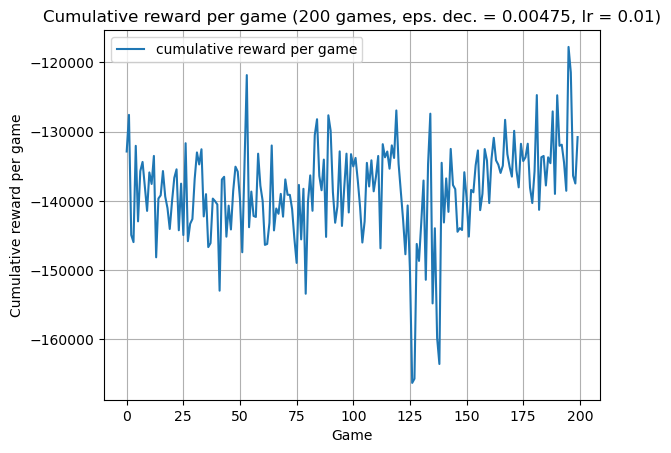

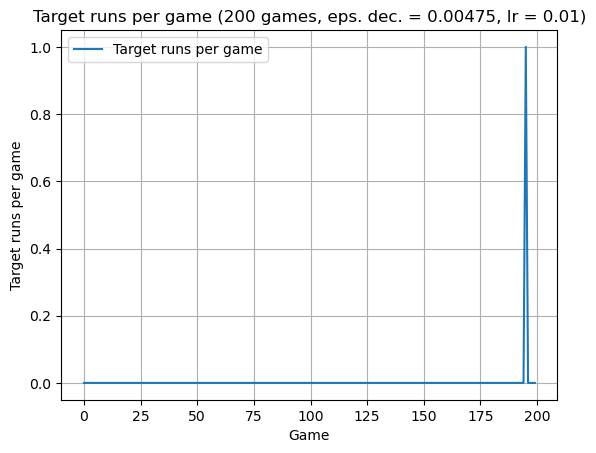

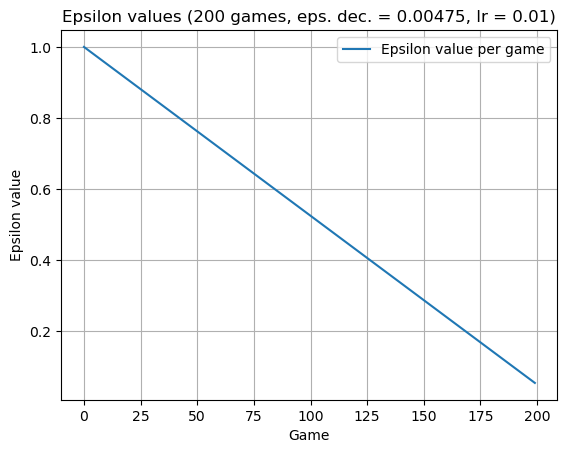

In [22]:
#Setting all relevant parameters for the dqn:
p_epsilon = 1.0                     #Epsilon start value
p_eps_dec = 0.00475                 #Epsilon descent value
p_eps_end = 0.05                    #Epsilon final value
p_lr = 0.01                         #Learning rate
p_gamma = 0.95                      #Discount factor 
p_dims_input = 128                  #Dimension of the input
p_dims_fc1 = 2048                   #Dimension of the first fully connected layer
p_dims_fc2 = 2048                   #Dimension of the second fully connected layer
p_batch_size = 16                   #Batch size
p_max_mem_size = 100000             #Maximum memory size
p_n_actions = 3                     #Number of possible actions
p_n_games = 200                     #Number of games
p_max_reward = 10000000             #Maximum reward
p_min_reward = -10000000            #Minimum reward

#Creating the environment and the agent
env = ClipReward(gym.make("ALE/Freeway-v5", difficulty = 1, mode = 3, obs_type = "ram"), p_min_reward, p_max_reward)
agent = Agent(p_gamma, p_lr, p_epsilon, p_eps_dec, p_eps_end, p_dims_input, p_dims_fc1, p_dims_fc2, p_batch_size, p_max_mem_size, p_n_actions)

#Creating lists for the cumulative reward, the epsilon history and the target runs
cum_reward_list, eps_history_list, target_runs_list = [], [], []

for i in range(p_n_games):
    cum_reward = 0
    done = False
    #Recieving the first state
    observation = env.reset()[0]

    while not done:
        #Choose an action (after conversion from int to float values)
        action = agent.choose_action(np.float32(observation))

        #Recieving the new state, reward and termination information (cutting off unnecessary information)
        observation_, reward, done = env.step(action)[:3]

        #Updating the cumulative reward
        cum_reward += reward

        #Storing the transition
        agent.store_transition(observation, action, reward, observation_, done)

        #Getting the agent to learn
        agent.learn()

        #Updating the previous state
        observation = observation_

    #Recieving the number of target runs during the last game
    target_runs = ClipReward.get_TargetRuns(env)

    #Appending the cumulative reward, the epsilon history and the target runs
    cum_reward_list.append(cum_reward)
    eps_history_list.append(agent.epsilon)
    target_runs_list.append(target_runs)

    #Printing the most important information
    print('Episode: ', i, ', Cumulative reward: ', cum_reward, ', Epsilon: %.8f' % agent.epsilon, ', Target runs: ', target_runs)

    #Resetting the number of target runs
    ClipReward.reset_TargetRuns(env)

    #Updating epsilon
    Agent.decreaseEpsilon(agent)

    #Saving models every 100 games (in case learning needs to be interrupted)
    if(i % 100 == 0):
        saving_path = 'C:\\Users\Jan Felix\Desktop\dqn_model\wew3lest_episode'+ str(i) +'.pth'
        T.save(Agent.getModel(agent), saving_path)

#Saving the trained model
T.save(Agent.getModel(agent), 'C:\\Users\Jan Felix\Desktop\dqn_model\wew3lest.pth')

#Results and plotting:
print('----------------------------------------------------------------------------')
print(f"""In this run we used the follwing parameters:
    Epsilon start value: {p_epsilon}
    Epsilon descent value: {p_eps_dec}
    Epsilon final value: {p_eps_end}
    Learning rate: {p_lr}
    Discount factor: {p_gamma}
    Dimension of the input: {p_dims_input}
    Dimension of the first fully connected layer: {p_dims_fc1}
    Dimension of the second fully connected layer: {p_dims_fc2}
    Batch size: {p_batch_size}
    Maximum memory size: {p_max_mem_size}
    Number of possible actions: {p_n_actions}
    Number of games: {p_n_games}
    Maximum reward: {p_max_reward}
    Minimum reward: {p_min_reward}"""
)

x = np.arange(0, p_n_games)
plt.plot(x, cum_reward_list, label = "cumulative reward per game")                          #Cumulative reward per game
plt.title(f"Cumulative reward per game ({p_n_games} games, eps. dec. = {p_eps_dec}, lr = {p_lr})")
plt.xlabel("Game")
plt.ylabel("Cumulative reward per game")
plt.legend()
plt.grid()
plt.show()

plt.plot(x, target_runs_list, label = "Target runs per game")                               #Amount of target runs
plt.title(f"Target runs per game ({p_n_games} games, eps. dec. = {p_eps_dec}, lr = {p_lr})")
plt.xlabel("Game")
plt.ylabel("Target runs per game")
plt.legend()
plt.grid()
plt.show()

plt.plot(x, eps_history_list, label = "Epsilon value per game")                             #Epsilon history
plt.title(f"Epsilon values ({p_n_games} games, eps. dec. = {p_eps_dec}, lr = {p_lr})")
plt.xlabel("Game")
plt.ylabel("Epsilon value")
plt.legend()
plt.grid()
plt.show()

### 6. Running the dqn ###

#### 6.1 Run: games = 400 , epsilon descent 1.5e-6, learning rate = 0.003, discount factor = 0.99 ####

C:\Users\Jan Felix\AppData\Local\Temp\ipykernel_13688\3759288688.py:35: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:233.)
  state = T.tensor([observation]).to(self.Q_eval.device)


0
episode  0 score -12720.00 epsilon 1.00
0
episode  1 score -13320.00 epsilon 0.99
0
episode  2 score -12470.00 epsilon 0.99
0
episode  3 score -12630.00 epsilon 0.99
0
episode  4 score -13110.00 epsilon 0.98
0
episode  5 score -14010.00 epsilon 0.98
0
episode  6 score -12560.00 epsilon 0.98
0
episode  7 score -11420.00 epsilon 0.98
0
episode  8 score -11140.00 epsilon 0.97
0
episode  9 score -10970.00 epsilon 0.97
0
episode  10 score -12230.00 epsilon 0.97
0
episode  11 score -10500.00 epsilon 0.96
0
episode  12 score -12650.00 epsilon 0.96
0
episode  13 score -10210.00 epsilon 0.96
0
episode  14 score -12640.00 epsilon 0.95
0
episode  15 score -12410.00 epsilon 0.95
0
episode  16 score -13360.00 epsilon 0.95
0
episode  17 score -10980.00 epsilon 0.94
0
episode  18 score -12220.00 epsilon 0.94
0
episode  19 score -12340.00 epsilon 0.94
0
episode  20 score -11490.00 epsilon 0.94
0
episode  21 score -11270.00 epsilon 0.93
0
episode  22 score -10650.00 epsilon 0.93
0
episode  23 score -

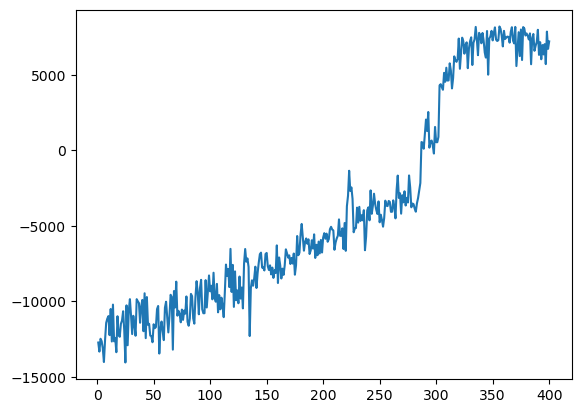

In [6]:
#Importing modules
import gym
import numpy as np
from matplotlib import pyplot as plt

#Creating the environment and the agent
env = ClipReward(gym.make("ALE/Freeway-v5", difficulty = 1, mode = 3, obs_type = "ram"), -100, 100)
agent = Agent(gamma = 0.99, epsilon = 1.0, batch_size = 64, n_actions = 3, eps_end = 0.01, input_dims = [128], lr = 0.003)

#Creating lists for the score (cumulative reward) and the epsilon history
scores, eps_history = [], []
n_games = 400

for i in range(n_games):
    score = 0
    done = False
    
    #Recieving the first state
    observation = env.reset()[0]

    while not done:
        #Choose an action (after conversion from int to float values)
        action = agent.choose_action(np.float32(observation))

        #Recieving the new state, reward and termination information (cutting off unnecessary information)
        observation_, reward, done = env.step(action)[:3]

        #Updating the score
        score += reward

        #Storing the transition
        agent.store_transition(observation, action, reward, observation_, done)
        
        #Getting the agent to learn
        agent.learn()
        
        #Updating the previous state
        observation = observation_
    
    #Appending the score and the epsilon history
    scores.append(score)
    eps_history.append(agent.epsilon)

    #Recieving the number of target runs during the last game
    print(ClipReward.get_TargetRuns(env))

    #Printing the most important information
    print('episode ', i, 'score %.2f' % score, 'epsilon %.2f' % agent.epsilon)

#Saving the trained model
T.save(Agent.getModel(agent), 'C:\\Users\Jan Felix\Desktop\dqn_model\dadajdand2')

#Plotting:
x = [i + 1 for i in range(n_games)]
plt.plot(x, scores)
plt.show()

#### 6.2 Run: games = 1000 , epsilon descent 6.1875e-7, learning rate = 0.003, discount factor = 0.99 ####

C:\Users\Jan Felix\AppData\Local\Temp\ipykernel_13796\2219341422.py:45: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:233.)
  state = T.tensor([observation]).to(self.Q_eval.device)


Episode:  0 , Cumulative reward:  -52845.0 , Epsilon: 0.99877178 , Target runs:  0
Episode:  1 , Cumulative reward:  -56825.0 , Epsilon: 0.99750458 , Target runs:  0
Episode:  2 , Cumulative reward:  -54839.0 , Epsilon: 0.99623738 , Target runs:  0
Episode:  3 , Cumulative reward:  -47864.0 , Epsilon: 0.99497018 , Target runs:  0
Episode:  4 , Cumulative reward:  -53853.0 , Epsilon: 0.99370298 , Target runs:  0
Episode:  5 , Cumulative reward:  -55835.0 , Epsilon: 0.99243578 , Target runs:  0
Episode:  6 , Cumulative reward:  -51864.0 , Epsilon: 0.99116858 , Target runs:  0
Episode:  7 , Cumulative reward:  -51846.0 , Epsilon: 0.98990138 , Target runs:  0
Episode:  8 , Cumulative reward:  -53855.0 , Epsilon: 0.98863418 , Target runs:  0
Episode:  9 , Cumulative reward:  -53842.0 , Epsilon: 0.98736698 , Target runs:  0
Episode:  10 , Cumulative reward:  -47848.0 , Epsilon: 0.98609978 , Target runs:  0
Episode:  11 , Cumulative reward:  -60832.0 , Epsilon: 0.98483258 , Target runs:  0
Ep

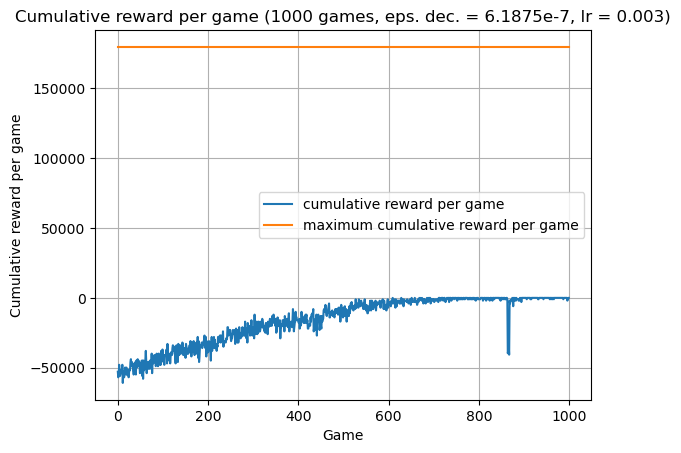

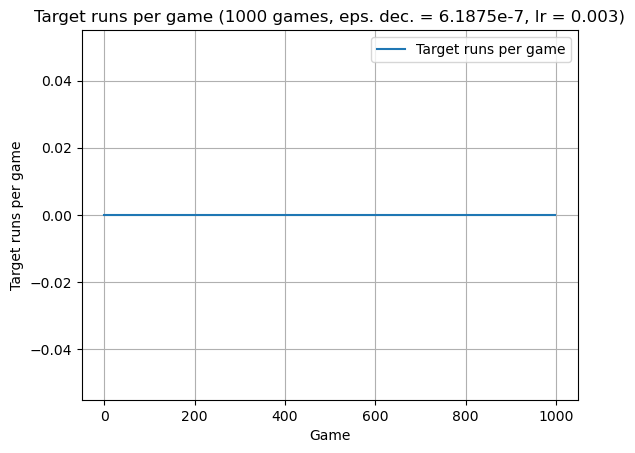

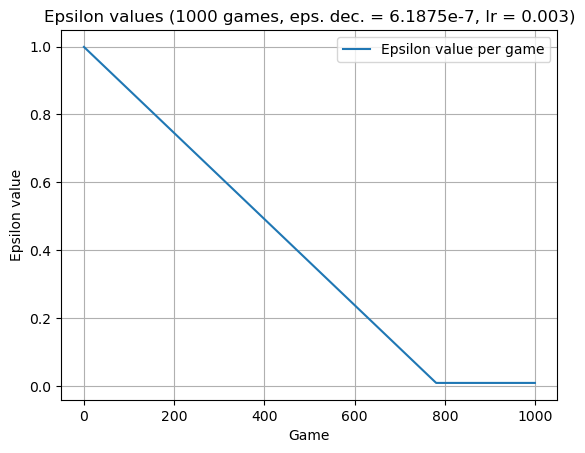

In [7]:
#Importing modules
import gym
import numpy as np
import matplotlib.pyplot as plt

#Creating the environment and the agent
env = ClipReward(gym.make("ALE/Freeway-v5", difficulty = 1, mode = 3, obs_type = "ram"), -1000, 10000)
agent = Agent(gamma = 0.99, epsilon = 1.0, batch_size = 64, n_actions = 3, eps_end = 0.01, input_dims = [128], lr = 0.003)

#Creating lists for the cumulative reward, the epsilon history and the target runs
cum_reward_list, eps_history_list, target_runs_list = [], [], []
n_games = 1000                                                      #Number of games
max_cum_reward = [(3000/170) * (1 * 170 + 10000)] * n_games         #Maximum cumulative reward

for i in range(n_games):
    cum_reward = 0
    done = False
    #Recieving the first state
    observation = env.reset()[0]
    
    while not done:
        #Choose an action (after conversion from int to float values)
        action = agent.choose_action(np.float32(observation))
        
        #Recieving the new state, reward and termination information (cutting off unnecessary information)
        observation_, reward, done = env.step(action)[:3]

        #Updating the cumulative reward
        cum_reward += reward

        #Storing the transition
        agent.store_transition(observation, action, reward, observation_, done)

        #Getting the agent to learn
        agent.learn()

        #Updating the previous state
        observation = observation_
    
    #Recieving the number of target runs during the last game
    target_runs = ClipReward.get_TargetRuns(env)

    #Appending the cumulative reward, the epsilon history and the target runs
    cum_reward_list.append(cum_reward)
    eps_history_list.append(agent.epsilon)
    target_runs_list.append(target_runs)

    #Printing the most important information
    print('Episode: ', i, ', Cumulative reward: ', cum_reward, ', Epsilon: %.8f' % agent.epsilon, ', Target runs: ', target_runs)

    #Resetting the number of target runs
    ClipReward.reset_TargetRuns(env)

    #Saving models every 100 games (in case learning needs to be interrupted)
    if(i % 100 == 0):
        saving_path = 'C:\\Users\Jan Felix\Desktop\dqn_model\model_1000games_10000maxreward_episode'+ str(i) +'.pth'
        T.save(Agent.getModel(agent), saving_path)

#Saving the trained model
T.save(Agent.getModel(agent), 'C:\\Users\Jan Felix\Desktop\dqn_model\model_finished_1000games_10000maxreward.pth')

#Plotting:
x = np.arange(0, n_games)
plt.plot(x, cum_reward_list, label = "cumulative reward per game")                          #Cummulative reward per game
plt.plot(x, max_cum_reward, label = "maximum cumulative reward per game")                   #Maximum cummulative reward per game
plt.title("Cumulative reward per game (1000 games, eps. dec. = 6.1875e-7, lr = 0.003)")
plt.xlabel("Game")
plt.ylabel("Cumulative reward per game")
plt.legend()
plt.grid()
plt.show()

plt.plot(x, target_runs_list, label = "Target runs per game")                               #amount of target runs
plt.title("Target runs per game (1000 games, eps. dec. = 6.1875e-7, lr = 0.003)")
plt.xlabel("Game")
plt.ylabel("Target runs per game")
plt.legend()
plt.grid()
plt.show()

plt.plot(x, eps_history_list, label = "Epsilon value per game")                             #amount of target runs
plt.title("Epsilon values (1000 games, eps. dec. = 6.1875e-7, lr = 0.003)")
plt.xlabel("Game")
plt.ylabel("Epsilon value")
plt.legend()
plt.grid()
plt.show()

#### 6.3 Run: games = 500 , epsilon descent 1.2375e^-6, learning rate = 0.005, discount factor = 0.99 ####

Episode:  0 , Cumulative reward:  -52540.0 , Epsilon: 0.99754356 , Target runs:  0
Episode:  1 , Cumulative reward:  -54405.0 , Epsilon: 0.99500916 , Target runs:  0
Episode:  2 , Cumulative reward:  -52453.0 , Epsilon: 0.99247476 , Target runs:  0
Episode:  3 , Cumulative reward:  -51538.0 , Epsilon: 0.98994036 , Target runs:  0
Episode:  4 , Cumulative reward:  -48428.0 , Epsilon: 0.98740596 , Target runs:  0
Episode:  5 , Cumulative reward:  -57510.0 , Epsilon: 0.98487156 , Target runs:  0
Episode:  6 , Cumulative reward:  -43318.0 , Epsilon: 0.98233716 , Target runs:  0
Episode:  7 , Cumulative reward:  -53451.0 , Epsilon: 0.97980276 , Target runs:  0
Episode:  8 , Cumulative reward:  -50512.0 , Epsilon: 0.97726836 , Target runs:  0
Episode:  9 , Cumulative reward:  -53523.0 , Epsilon: 0.97473396 , Target runs:  0
Episode:  10 , Cumulative reward:  -43460.0 , Epsilon: 0.97219956 , Target runs:  0
Episode:  11 , Cumulative reward:  -42439.0 , Epsilon: 0.96966516 , Target runs:  0
Ep

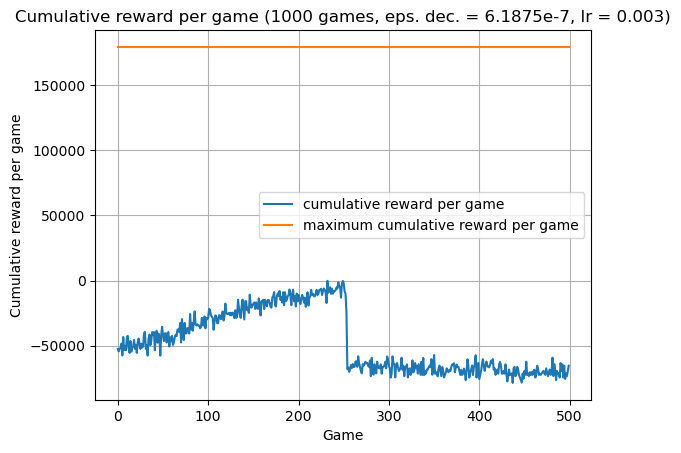

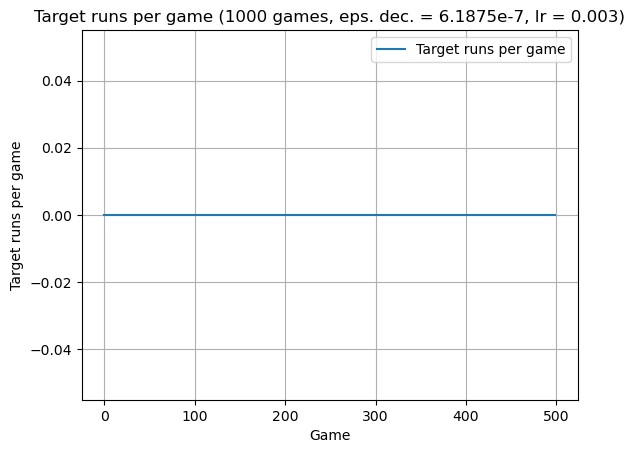

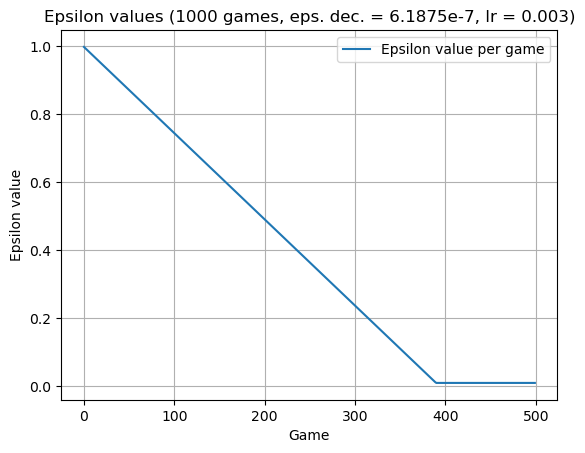

In [8]:
#Importing modules
import gym
import numpy as np
import matplotlib.pyplot as plt

#Creating the environment and the agent
env = ClipReward(gym.make("ALE/Freeway-v5", difficulty = 1, mode = 3, obs_type = "ram"), -1000, 10000)
agent = Agent(gamma = 0.99, epsilon = 1.0, batch_size = 64, n_actions = 3, eps_end = 0.01, input_dims = [128], lr = 0.005)

#Creating lists for the cumulative reward, the epsilon history and the target runs
cum_reward_list, eps_history_list, target_runs_list = [], [], []
n_games = 500                                                       #Number of games
max_cum_reward = [(3000/170) * (1 * 170 + 10000)] * n_games         #Maximum cumulative reward

for i in range(n_games):
    cum_reward = 0
    done = False
    #Recieving the first state
    observation = env.reset()[0]
    
    while not done:
        #Choose an action (after conversion from int to float values)
        action = agent.choose_action(np.float32(observation))
        
        #Recieving the new state, reward and termination information (cutting off unnecessary information)
        observation_, reward, done = env.step(action)[:3]

        #Updating the cumulative reward
        cum_reward += reward

        #Storing the transition
        agent.store_transition(observation, action, reward, observation_, done)

        #Getting the agent to learn
        agent.learn()

        #Updating the previous state
        observation = observation_
    
    #Recieving the number of target runs during the last game
    target_runs = ClipReward.get_TargetRuns(env)

    #Appending the cumulative reward, the epsilon history and the target runs
    cum_reward_list.append(cum_reward)
    eps_history_list.append(agent.epsilon)
    target_runs_list.append(target_runs)

    #Printing the most important information
    print('Episode: ', i, ', Cumulative reward: ', cum_reward, ', Epsilon: %.8f' % agent.epsilon, ', Target runs: ', target_runs)

    #Resetting the number of target runs
    ClipReward.reset_TargetRuns(env)

    #Saving models every 100 games (in case learning needs to be interrupted)
    if(i % 100 == 0):
        saving_path = 'C:\\Users\Jan Felix\Desktop\dqn_model\model_1000games_10000maxreward_episode'+ str(i) +'.pth'
        T.save(Agent.getModel(agent), saving_path)

#Saving the trained model
T.save(Agent.getModel(agent), 'C:\\Users\Jan Felix\Desktop\dqn_model\model_finished_1000games_10000maxreward.pth')

#Plotting:
x = np.arange(0, n_games)
plt.plot(x, cum_reward_list, label = "cumulative reward per game")                          #Cummulative reward per game
plt.plot(x, max_cum_reward, label = "maximum cumulative reward per game")                   #Maximum cummulative reward per game
plt.title("Cumulative reward per game (1000 games, eps. dec. = 6.1875e-7, lr = 0.003)")
plt.xlabel("Game")
plt.ylabel("Cumulative reward per game")
plt.legend()
plt.grid()
plt.show()

plt.plot(x, target_runs_list, label = "Target runs per game")                               #amount of target runs
plt.title("Target runs per game (1000 games, eps. dec. = 6.1875e-7, lr = 0.003)")
plt.xlabel("Game")
plt.ylabel("Target runs per game")
plt.legend()
plt.grid()
plt.show()

plt.plot(x, eps_history_list, label = "Epsilon value per game")                             #amount of target runs
plt.title("Epsilon values (1000 games, eps. dec. = 6.1875e-7, lr = 0.003)")
plt.xlabel("Game")
plt.ylabel("Epsilon value")
plt.legend()
plt.grid()
plt.show()

#### 6.4 Letting the trained agent play the game ####

In [21]:
p_epsilon = 0.0                     #Epsilon start value
p_eps_dec = 0.002                   #Epsilon descent value
p_eps_end = 0.05                    #Epsilon final value
p_lr = 0.003                        #Learning rate
p_gamma = 0.95                      #Discount factor 
p_dims_input = 128                  #Dimension of the input
p_dims_fc1 = 256                    #Dimension of the first fully connected layer
p_dims_fc2 = 256                    #Dimension of the second fully connected layer
p_batch_size = 16                   #Batch size
p_max_mem_size = 100000             #Maximum memory size
p_n_actions = 3                     #Number of possible actions
p_n_games = 500                     #Number of games
p_max_reward = 10000000             #Maximum reward
p_min_reward = -10000000            #Minimum reward

#Creating the environment and the agent
env = ClipReward(gym.make("ALE/Freeway-v5", difficulty = 1, mode = 3, obs_type = "ram", render_mode = "human"), p_min_reward, p_max_reward)
agent = Agent(p_gamma, p_lr, p_epsilon, p_eps_dec, p_eps_end, p_dims_input, p_dims_fc1, p_dims_fc2, p_batch_size, p_max_mem_size, p_n_actions)
Agent.setModel(agent, 'C:\\Users\Jan Felix\Desktop\dqn_model\wew2lest.pth')

n_games = 3

#Recieving the first state
observation = env.reset()[0]
done = False

while not done:
    #Choose an action (after conversion from int to float values)
    action = agent.choose_action(np.float32(observation))

    #Recieving the new state, reward and termination information (cutting off unnecessary information)
    observation_, reward, done = env.step(action)[:3]
        
    #Updating the previous state
    observation = observation_

    env.render()

c:\Users\Jan Felix\anaconda3\lib\site-packages\gym\utils\passive_env_checker.py:289: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


KeyboardInterrupt: 

# TODO: Weg finden, um einen möglichen CPU Bottleneck zu vermeiden #

Episode:  0 , Cumulative reward:  -2565.0 , Epsilon: 0.99754356 , Target runs:  0
Episode:  1 , Cumulative reward:  -2631.0 , Epsilon: 0.99500916 , Target runs:  0
Episode:  2 , Cumulative reward:  -1628.0 , Epsilon: 0.99247476 , Target runs:  0
Episode:  3 , Cumulative reward:  -2281.0 , Epsilon: 0.98994036 , Target runs:  0
Episode:  4 , Cumulative reward:  -1919.0 , Epsilon: 0.98740596 , Target runs:  0
Episode:  5 , Cumulative reward:  -2187.0 , Epsilon: 0.98487156 , Target runs:  0
Episode:  6 , Cumulative reward:  -2447.0 , Epsilon: 0.98233716 , Target runs:  0
Episode:  7 , Cumulative reward:  -2450.0 , Epsilon: 0.97980276 , Target runs:  0
Episode:  8 , Cumulative reward:  -2463.0 , Epsilon: 0.97726836 , Target runs:  0
Episode:  9 , Cumulative reward:  -2365.0 , Epsilon: 0.97473396 , Target runs:  0
Episode:  10 , Cumulative reward:  -2613.0 , Epsilon: 0.97219956 , Target runs:  0
Episode:  11 , Cumulative reward:  -3007.0 , Epsilon: 0.96966516 , Target runs:  0
Episode:  12 ,

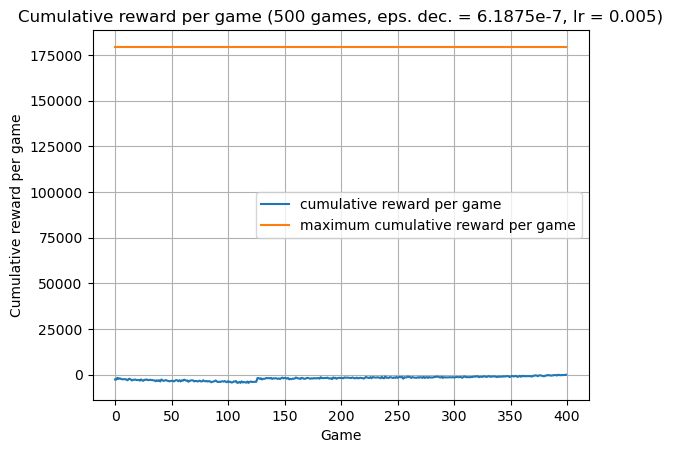

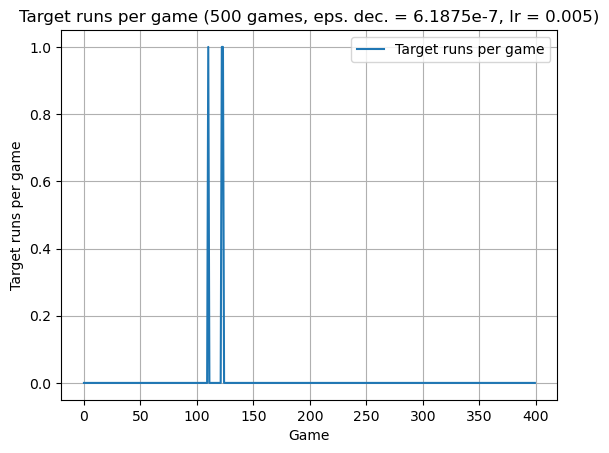

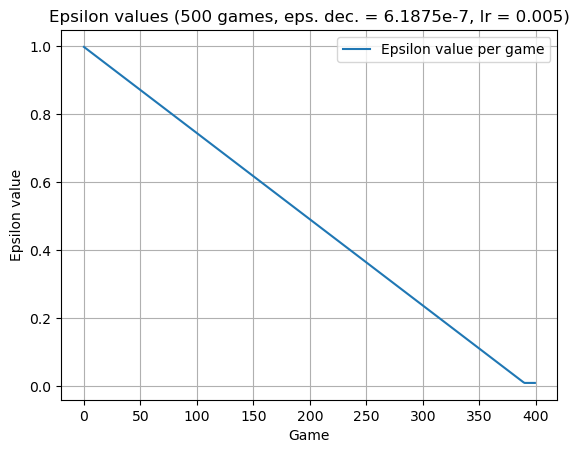

In [7]:
#Importing modules
import gym
import numpy as np
import matplotlib.pyplot as plt

#Creating the environment and the agent
env = ClipReward(gym.make("ALE/Freeway-v5", difficulty = 1, mode = 5, obs_type = "ram"), -1000, 10000)
agent = Agent(gamma = 0.99, epsilon = 1.0, batch_size = 64, n_actions = 3, eps_end = 0.01, input_dims = [128], lr = 0.005)

#Creating lists for the cumulative reward, the epsilon history and the target runs
cum_reward_list, eps_history_list, target_runs_list = [], [], []
n_games = 400                                                       #Number of games
max_cum_reward = [(3000/170) * (1 * 170 + 10000)] * n_games         #Maximum cumulative reward

for i in range(n_games):
    cum_reward = 0
    done = False
    #Recieving the first state
    observation = env.reset()[0]
    
    while not done:
        #Choose an action (after conversion from int to float values)
        action = agent.choose_action(np.float32(observation))
        
        #Recieving the new state, reward and termination information (cutting off unnecessary information)
        observation_, reward, done = env.step(action)[:3]

        #Updating the cumulative reward
        cum_reward += reward

        #Storing the transition
        agent.store_transition(observation, action, reward, observation_, done)

        #Getting the agent to learn
        agent.learn()

        #Updating the previous state
        observation = observation_
    
    #Recieving the number of target runs during the last game
    target_runs = ClipReward.get_TargetRuns(env)

    #Appending the cumulative reward, the epsilon history and the target runs
    cum_reward_list.append(cum_reward)
    eps_history_list.append(agent.epsilon)
    target_runs_list.append(target_runs)

    #Printing the most important information
    print('Episode: ', i, ', Cumulative reward: ', cum_reward, ', Epsilon: %.8f' % agent.epsilon, ', Target runs: ', target_runs)

    #Resetting the number of target runs
    ClipReward.reset_TargetRuns(env)

    #Saving models every 100 games (in case learning needs to be interrupted)
    if(i % 100 == 0):
        saving_path = 'C:\\Users\Jan Felix\Desktop\dqn_model\model_500games_100maxreward_episode'+ str(i) +'.pth'
        T.save(Agent.getModel(agent), saving_path)

#Saving the trained model
T.save(Agent.getModel(agent), 'C:\\Users\Jan Felix\Desktop\dqn_model\model_finished_500games_100maxreward.pth')

#Plotting:
x = np.arange(0, n_games)
plt.plot(x, cum_reward_list, label = "cumulative reward per game")                          #Cummulative reward per game
plt.plot(x, max_cum_reward, label = "maximum cumulative reward per game")                   #Maximum cummulative reward per game
plt.title("Cumulative reward per game (500 games, eps. dec. = 6.1875e-7, lr = 0.005)")
plt.xlabel("Game")
plt.ylabel("Cumulative reward per game")
plt.legend()
plt.grid()
plt.show()

plt.plot(x, target_runs_list, label = "Target runs per game")                               #amount of target runs
plt.title("Target runs per game (500 games, eps. dec. = 6.1875e-7, lr = 0.005)")
plt.xlabel("Game")
plt.ylabel("Target runs per game")
plt.legend()
plt.grid()
plt.show()

plt.plot(x, eps_history_list, label = "Epsilon value per game")                             #amount of target runs
plt.title("Epsilon values (500 games, eps. dec. = 6.1875e-7, lr = 0.005)")
plt.xlabel("Game")
plt.ylabel("Epsilon value")
plt.legend()
plt.grid()
plt.show()

NEU


Episode:  0 , Cumulative reward:  -932.0 , Epsilon: 0.99754356 , Target runs:  0
Episode:  1 , Cumulative reward:  -1262.0 , Epsilon: 0.99500916 , Target runs:  0
Episode:  2 , Cumulative reward:  -621.0 , Epsilon: 0.99247476 , Target runs:  0
Episode:  3 , Cumulative reward:  -1583.0 , Epsilon: 0.98994036 , Target runs:  0
Episode:  4 , Cumulative reward:  -294.0 , Epsilon: 0.98740596 , Target runs:  0
Episode:  5 , Cumulative reward:  -1625.0 , Epsilon: 0.98487156 , Target runs:  0
Episode:  6 , Cumulative reward:  -1011.0 , Epsilon: 0.98233716 , Target runs:  0
Episode:  7 , Cumulative reward:  -992.0 , Epsilon: 0.97980276 , Target runs:  0
Episode:  8 , Cumulative reward:  -1425.0 , Epsilon: 0.97726836 , Target runs:  0
Episode:  9 , Cumulative reward:  -1362.0 , Epsilon: 0.97473396 , Target runs:  0
Episode:  10 , Cumulative reward:  -2016.0 , Epsilon: 0.97219956 , Target runs:  0
Episode:  11 , Cumulative reward:  -1282.0 , Epsilon: 0.96966516 , Target runs:  0
Episode:  12 , Cum

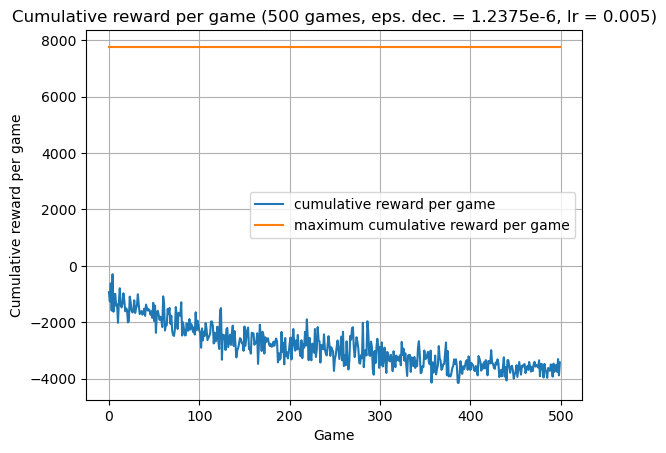

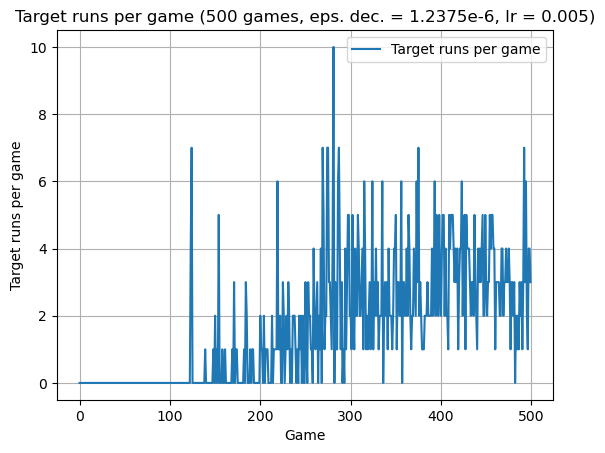

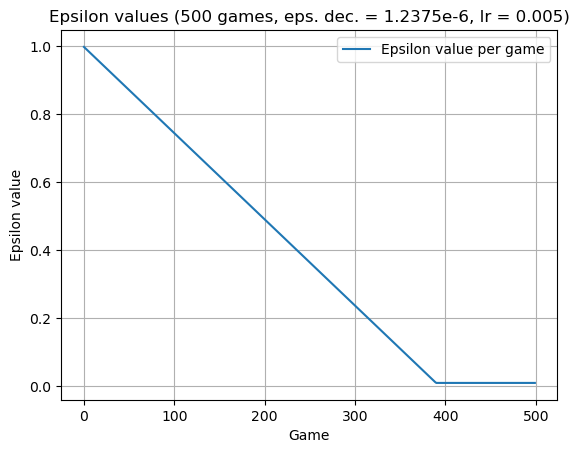

In [5]:
#Importing modules
import gym
import numpy as np
import matplotlib.pyplot as plt

#Creating the environment and the agent
env = ClipReward(gym.make("ALE/Freeway-v5", difficulty = 1, mode = 5, obs_type = "ram"), -1000, 10000)
agent = Agent(gamma = 0.99, epsilon = 1.0, batch_size = 64, n_actions = 3, eps_end = 0.01, input_dims = [128], lr = 0.005)

#Creating lists for the cumulative reward, the epsilon history and the target runs
cum_reward_list, eps_history_list, target_runs_list = [], [], []
n_games = 500                                                       #Number of games
max_cum_reward = [(3000/170) * (2 * 170 + 100)] * n_games           #Maximum cumulative reward

for i in range(n_games):
    cum_reward = 0
    done = False
    #Recieving the first state
    observation = env.reset()[0]
    
    while not done:
        #Choose an action (after conversion from int to float values)
        action = agent.choose_action(np.float32(observation))
        
        #Recieving the new state, reward and termination information (cutting off unnecessary information)
        observation_, reward, done = env.step(action)[:3]

        #Updating the cumulative reward
        cum_reward += reward

        #Storing the transition
        agent.store_transition(observation, action, reward, observation_, done)

        #Getting the agent to learn
        agent.learn()

        #Updating the previous state
        observation = observation_
    
    #Recieving the number of target runs during the last game
    target_runs = ClipReward.get_TargetRuns(env)

    #Appending the cumulative reward, the epsilon history and the target runs
    cum_reward_list.append(cum_reward)
    eps_history_list.append(agent.epsilon)
    target_runs_list.append(target_runs)

    #Printing the most important information
    print('Episode: ', i, ', Cumulative reward: ', cum_reward, ', Epsilon: %.8f' % agent.epsilon, ', Target runs: ', target_runs)

    #Resetting the number of target runs
    ClipReward.reset_TargetRuns(env)

    #Saving models every 100 games (in case learning needs to be interrupted)
    if(i % 100 == 0):
        saving_path = 'C:\\Users\Jan Felix\Desktop\dqn_model\model_500games_100maxreward_2forward_episode'+ str(i) +'.pth'
        T.save(Agent.getModel(agent), saving_path)

#Saving the trained model
T.save(Agent.getModel(agent), 'C:\\Users\Jan Felix\Desktop\dqn_model\model_finished_500games_100maxreward_2forward.pth')

#Plotting:
x = np.arange(0, n_games)
plt.plot(x, cum_reward_list, label = "cumulative reward per game")                          #Cummulative reward per game
plt.plot(x, max_cum_reward, label = "maximum cumulative reward per game")                   #Maximum cummulative reward per game
plt.title("Cumulative reward per game (500 games, eps. dec. = 1.2375e-6, lr = 0.005)")
plt.xlabel("Game")
plt.ylabel("Cumulative reward per game")
plt.legend()
plt.grid()
plt.show()

plt.plot(x, target_runs_list, label = "Target runs per game")                               #amount of target runs
plt.title("Target runs per game (500 games, eps. dec. = 1.2375e-6, lr = 0.005)")
plt.xlabel("Game")
plt.ylabel("Target runs per game")
plt.legend()
plt.grid()
plt.show()

plt.plot(x, eps_history_list, label = "Epsilon value per game")                             #amount of target runs
plt.title("Epsilon values (500 games, eps. dec. = 1.2375e-6, lr = 0.005)")
plt.xlabel("Game")
plt.ylabel("Epsilon value")
plt.legend()
plt.grid()
plt.show()

Nochmal neu: 

Episode:  0 , Cumulative reward:  -955.0 , Epsilon: 0.99754356 , Target runs:  0
Episode:  1 , Cumulative reward:  -743.0 , Epsilon: 0.99500916 , Target runs:  0
Episode:  2 , Cumulative reward:  -676.0 , Epsilon: 0.99247476 , Target runs:  0
Episode:  3 , Cumulative reward:  -1034.0 , Epsilon: 0.98994036 , Target runs:  0
Episode:  4 , Cumulative reward:  -1011.0 , Epsilon: 0.98740596 , Target runs:  0
Episode:  5 , Cumulative reward:  -1450.0 , Epsilon: 0.98487156 , Target runs:  0
Episode:  6 , Cumulative reward:  -1481.0 , Epsilon: 0.98233716 , Target runs:  0
Episode:  7 , Cumulative reward:  -809.0 , Epsilon: 0.97980276 , Target runs:  0
Episode:  8 , Cumulative reward:  -1020.0 , Epsilon: 0.97726836 , Target runs:  0
Episode:  9 , Cumulative reward:  -944.0 , Epsilon: 0.97473396 , Target runs:  0
Episode:  10 , Cumulative reward:  -1315.0 , Epsilon: 0.97219956 , Target runs:  0
Episode:  11 , Cumulative reward:  -589.0 , Epsilon: 0.96966516 , Target runs:  0
Episode:  12 , Cumul

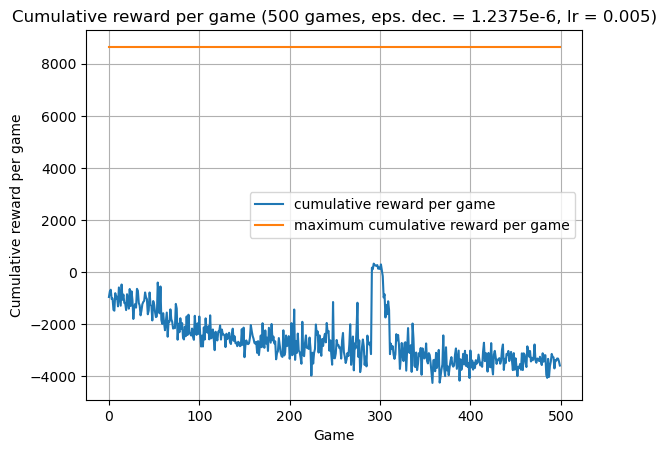

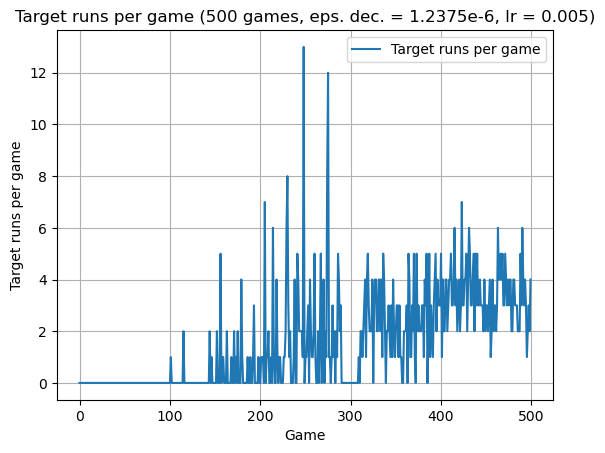

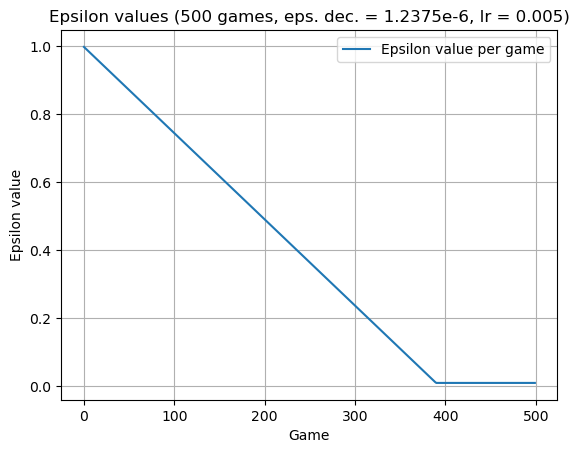

In [12]:
#Importing modules
import gym
import numpy as np
import matplotlib.pyplot as plt

#Creating the environment and the agent
env = ClipReward(gym.make("ALE/Freeway-v5", difficulty = 1, mode = 5, obs_type = "ram"), -1000, 10000)
agent = Agent(gamma = 0.99, epsilon = 1.0, batch_size = 64, n_actions = 3, eps_end = 0.01, input_dims = [128], lr = 0.005)

#Creating lists for the cumulative reward, the epsilon history and the target runs
cum_reward_list, eps_history_list, target_runs_list = [], [], []
n_games = 500                                                       #Number of games
max_cum_reward = [(3000/170) * (2 * 170 + 150)] * n_games           #Maximum cumulative reward

for i in range(n_games):
    cum_reward = 0
    done = False
    #Recieving the first state
    observation = env.reset()[0]
    
    while not done:
        #Choose an action (after conversion from int to float values)
        action = agent.choose_action(np.float32(observation))
        
        #Recieving the new state, reward and termination information (cutting off unnecessary information)
        observation_, reward, done = env.step(action)[:3]

        #Updating the cumulative reward
        cum_reward += reward

        #Storing the transition
        agent.store_transition(observation, action, reward, observation_, done)

        #Getting the agent to learn
        agent.learn()

        #Updating the previous state
        observation = observation_
    
    #Recieving the number of target runs during the last game
    target_runs = ClipReward.get_TargetRuns(env)

    #Appending the cumulative reward, the epsilon history and the target runs
    cum_reward_list.append(cum_reward)
    eps_history_list.append(agent.epsilon)
    target_runs_list.append(target_runs)

    #Printing the most important information
    print('Episode: ', i, ', Cumulative reward: ', cum_reward, ', Epsilon: %.8f' % agent.epsilon, ', Target runs: ', target_runs)

    #Resetting the number of target runs
    ClipReward.reset_TargetRuns(env)

    #Saving models every 100 games (in case learning needs to be interrupted)
    if(i % 100 == 0):
        saving_path = 'C:\\Users\Jan Felix\Desktop\dqn_model\model_500games_100maxreward_3forward_150finish_episode'+ str(i) +'.pth'
        T.save(Agent.getModel(agent), saving_path)

#Saving the trained model
T.save(Agent.getModel(agent), 'C:\\Users\Jan Felix\Desktop\dqn_model\model_finished_500games_100maxreward_3forward_150finish.pth')

#Plotting:
x = np.arange(0, n_games)
plt.plot(x, cum_reward_list, label = "cumulative reward per game")                          #Cummulative reward per game
plt.plot(x, max_cum_reward, label = "maximum cumulative reward per game")                   #Maximum cummulative reward per game
plt.title("Cumulative reward per game (500 games, eps. dec. = 1.2375e-6, lr = 0.005)")
plt.xlabel("Game")
plt.ylabel("Cumulative reward per game")
plt.legend()
plt.grid()
plt.show()

plt.plot(x, target_runs_list, label = "Target runs per game")                               #amount of target runs
plt.title("Target runs per game (500 games, eps. dec. = 1.2375e-6, lr = 0.005)")
plt.xlabel("Game")
plt.ylabel("Target runs per game")
plt.legend()
plt.grid()
plt.show()

plt.plot(x, eps_history_list, label = "Epsilon value per game")                             #amount of target runs
plt.title("Epsilon values (500 games, eps. dec. = 1.2375e-6, lr = 0.005)")
plt.xlabel("Game")
plt.ylabel("Epsilon value")
plt.legend()
plt.grid()
plt.show()

Episode:  0 , Cumulative reward:  -241217.5044963305 , Epsilon: 0.99606970 , Target runs:  0
Episode:  1 , Cumulative reward:  -246646.27762275556 , Epsilon: 0.99201466 , Target runs:  0
Episode:  2 , Cumulative reward:  -252365.08549182903 , Epsilon: 0.98795962 , Target runs:  0
Episode:  3 , Cumulative reward:  -252589.74208169355 , Epsilon: 0.98390458 , Target runs:  0
Episode:  4 , Cumulative reward:  -251368.33677136313 , Epsilon: 0.97984954 , Target runs:  0
Episode:  5 , Cumulative reward:  -250500.99081161083 , Epsilon: 0.97579450 , Target runs:  0
Episode:  6 , Cumulative reward:  -254669.04415687363 , Epsilon: 0.97173946 , Target runs:  0
Episode:  7 , Cumulative reward:  -233648.78137602628 , Epsilon: 0.96768442 , Target runs:  0
Episode:  8 , Cumulative reward:  -246041.15298544525 , Epsilon: 0.96362938 , Target runs:  0
Episode:  9 , Cumulative reward:  -241459.73238742954 , Epsilon: 0.95957434 , Target runs:  0
Episode:  10 , Cumulative reward:  -237273.84935330623 , Epsi

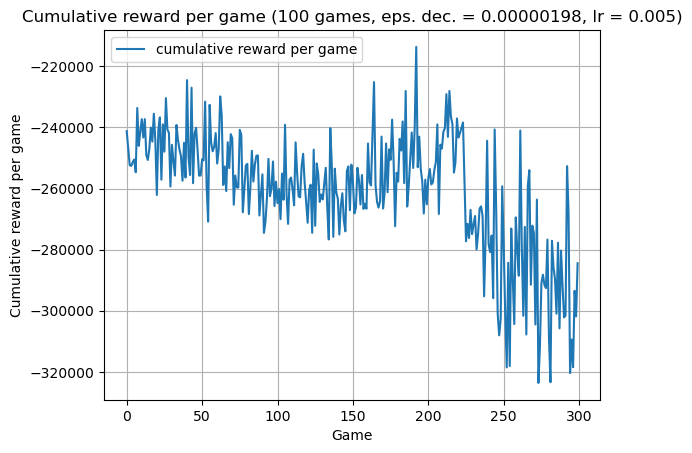

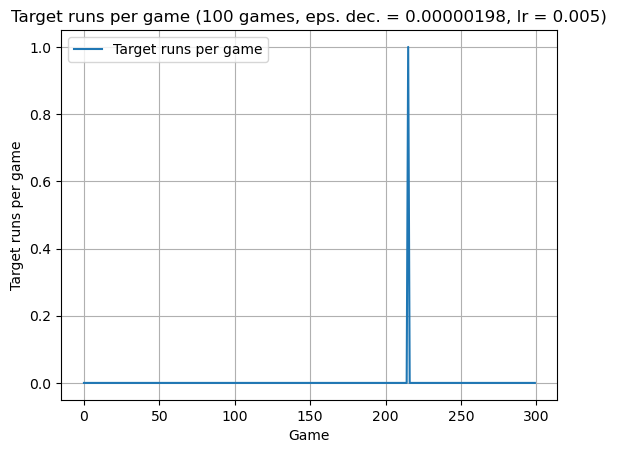

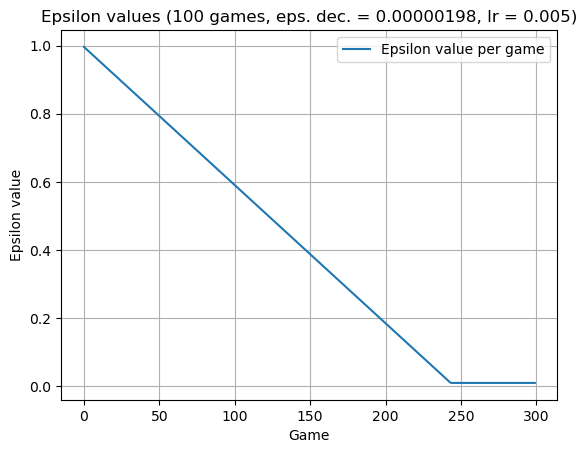

In [16]:
#Importing modules
import gym
import numpy as np
import matplotlib.pyplot as plt

#Creating the environment and the agent
env = ClipReward(gym.make("ALE/Freeway-v5", difficulty = 1, mode = 3, obs_type = "ram"), -1000, 10000)
agent = Agent(gamma = 0.99, epsilon = 1.0, batch_size = 64, n_actions = 3, eps_end = 0.01, input_dims = [128], lr = 0.005)

#Creating lists for the cumulative reward, the epsilon history and the target runs
cum_reward_list, eps_history_list, target_runs_list = [], [], []
n_games = 300                                                       #Number of games
#max_cum_reward = [(3000/170) * (1 * 170 + 10000)] * n_games         #Maximum cumulative reward

for i in range(n_games):
    cum_reward = 0
    done = False
    #Recieving the first state
    observation = env.reset()[0]
    
    while not done:
        #Choose an action (after conversion from int to float values)
        action = agent.choose_action(np.float32(observation))
        
        #Recieving the new state, reward and termination information (cutting off unnecessary information)
        observation_, reward, done = env.step(action)[:3]

        #Updating the cumulative reward
        cum_reward += reward

        #Storing the transition
        agent.store_transition(observation, action, reward, observation_, done)

        #Getting the agent to learn
        agent.learn()

        #Updating the previous state
        observation = observation_
    
    #Recieving the number of target runs during the last game
    target_runs = ClipReward.get_TargetRuns(env)

    #Appending the cumulative reward, the epsilon history and the target runs
    cum_reward_list.append(cum_reward)
    eps_history_list.append(agent.epsilon)
    target_runs_list.append(target_runs)

    #Printing the most important information
    print('Episode: ', i, ', Cumulative reward: ', cum_reward, ', Epsilon: %.8f' % agent.epsilon, ', Target runs: ', target_runs)

    #Resetting the number of target runs
    ClipReward.reset_TargetRuns(env)

    #Saving models every 100 games (in case learning needs to be interrupted)
    if(i % 100 == 0):
        saving_path = 'C:\\Users\Jan Felix\Desktop\dqn_model\model_finished_100games_1dividedbyX_episode'+ str(i) +'.pth'
        T.save(Agent.getModel(agent), saving_path)

#Saving the trained model
T.save(Agent.getModel(agent), 'C:\\Users\Jan Felix\Desktop\dqn_model\model_finished_100games_1dividedbyX.pth')

#Plotting:
x = np.arange(0, n_games)
plt.plot(x, cum_reward_list, label = "cumulative reward per game")                          #Cummulative reward per game
#plt.plot(x, max_cum_reward, label = "maximum cumulative reward per game")                   #Maximum cummulative reward per game
plt.title("Cumulative reward per game (100 games, eps. dec. = 0.00000198, lr = 0.005)")
plt.xlabel("Game")
plt.ylabel("Cumulative reward per game")
plt.legend()
plt.grid()
plt.show()

plt.plot(x, target_runs_list, label = "Target runs per game")                               #amount of target runs
plt.title("Target runs per game (100 games, eps. dec. = 0.00000198, lr = 0.005)")
plt.xlabel("Game")
plt.ylabel("Target runs per game")
plt.legend()
plt.grid()
plt.show()

plt.plot(x, eps_history_list, label = "Epsilon value per game")                             #amount of target runs
plt.title("Epsilon values (100 games, eps. dec. = 0.00000198, lr = 0.005)")
plt.xlabel("Game")
plt.ylabel("Epsilon value")
plt.legend()
plt.grid()
plt.show()

Episode:  0 , Cumulative reward:  -205630.0 , Epsilon: 0.99606970 , Target runs:  0
Episode:  1 , Cumulative reward:  -195281.0 , Epsilon: 0.99201466 , Target runs:  0
Episode:  2 , Cumulative reward:  -220409.0 , Epsilon: 0.98795962 , Target runs:  0
Episode:  3 , Cumulative reward:  -205461.5 , Epsilon: 0.98390458 , Target runs:  0
Episode:  4 , Cumulative reward:  -202591.0 , Epsilon: 0.97984954 , Target runs:  0
Episode:  5 , Cumulative reward:  -213751.5 , Epsilon: 0.97579450 , Target runs:  0
Episode:  6 , Cumulative reward:  -205984.5 , Epsilon: 0.97173946 , Target runs:  0
Episode:  7 , Cumulative reward:  -195341.5 , Epsilon: 0.96768442 , Target runs:  0
Episode:  8 , Cumulative reward:  -194750.5 , Epsilon: 0.96362938 , Target runs:  0
Episode:  9 , Cumulative reward:  -204970.5 , Epsilon: 0.95957434 , Target runs:  0
Episode:  10 , Cumulative reward:  -196111.5 , Epsilon: 0.95551930 , Target runs:  0
Episode:  11 , Cumulative reward:  -204395.5 , Epsilon: 0.95146426 , Target

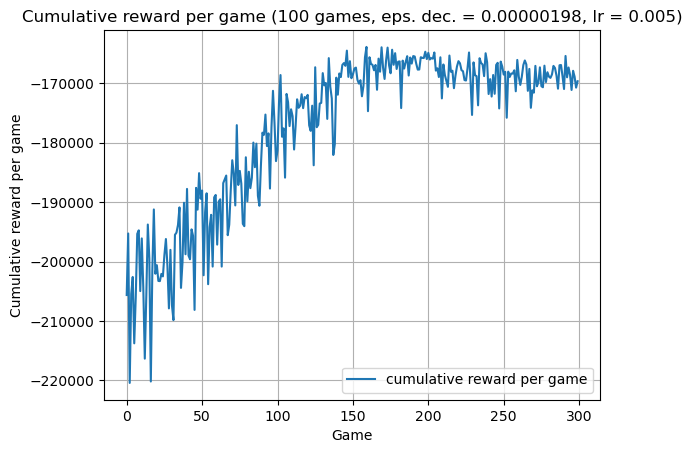

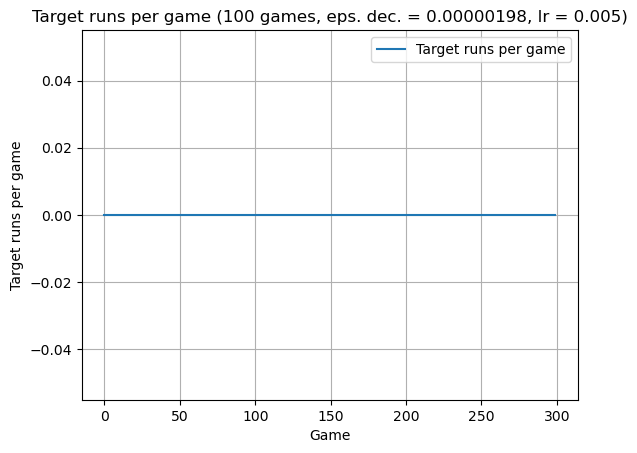

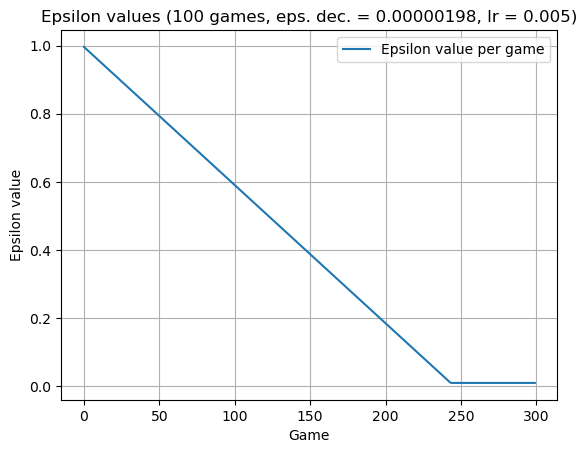

In [10]:
#Importing modules
import gym
import numpy as np
import matplotlib.pyplot as plt

#Creating the environment and the agent
env = LinearReward(gym.make("ALE/Freeway-v5", difficulty = 1, mode = 3, obs_type = "ram"))
agent = Agent(gamma = 0.99, epsilon = 1.0, batch_size = 64, n_actions = 3, eps_end = 0.01, input_dims = [128], lr = 0.005)

#Creating lists for the cumulative reward, the epsilon history and the target runs
cum_reward_list, eps_history_list, target_runs_list = [], [], []
n_games = 300                                                       #Number of games
#max_cum_reward = [(3000/170) * (1 * 170 + 10000)] * n_games         #Maximum cumulative reward

for i in range(n_games):
    cum_reward = 0
    done = False
    #Recieving the first state
    observation = env.reset()[0]
    
    while not done:
        #Choose an action (after conversion from int to float values)
        action = agent.choose_action(np.float32(observation))

        #Recieving the new state, reward and termination information (cutting off unnecessary information)
        observation_, reward, done = env.step(action)[:3]

        #Updating the cumulative reward
        cum_reward += reward

        #Storing the transition
        agent.store_transition(observation, action, reward, observation_, done)

        #Getting the agent to learn
        agent.learn()

        #Updating the previous state
        observation = observation_
    
    #Recieving the number of target runs during the last game
    target_runs = LinearReward.get_TargetRuns(env)

    #Appending the cumulative reward, the epsilon history and the target runs
    cum_reward_list.append(cum_reward)
    eps_history_list.append(agent.epsilon)
    target_runs_list.append(target_runs)

    #Printing the most important information
    print('Episode: ', i, ', Cumulative reward: ', cum_reward, ', Epsilon: %.8f' % agent.epsilon, ', Target runs: ', target_runs)

    #Resetting the number of target runs
    LinearReward.reset_TargetRuns(env)

    #Saving models every 100 games (in case learning needs to be interrupted)
    if(i % 100 == 0):
        saving_path = 'C:\\Users\Jan Felix\Desktop\dqn_model\lest_episode'+ str(i) +'.pth'
        T.save(Agent.getModel(agent), saving_path)

#Saving the trained model
T.save(Agent.getModel(agent), 'C:\\Users\Jan Felix\Desktop\dqn_model\lest.pth')

#Plotting:
x = np.arange(0, n_games)
plt.plot(x, cum_reward_list, label = "cumulative reward per game")                           #Cummulative reward per game
#plt.plot(x, max_cum_reward, label = "maximum cumulative reward per game")                   #Maximum cummulative reward per game
plt.title("Cumulative reward per game (100 games, eps. dec. = 0.00000198, lr = 0.005)")
plt.xlabel("Game")
plt.ylabel("Cumulative reward per game")
plt.legend()
plt.grid()
plt.show()

plt.plot(x, target_runs_list, label = "Target runs per game")                               #amount of target runs
plt.title("Target runs per game (100 games, eps. dec. = 0.00000198, lr = 0.005)")
plt.xlabel("Game")
plt.ylabel("Target runs per game")
plt.legend()
plt.grid()
plt.show()

plt.plot(x, eps_history_list, label = "Epsilon value per game")                             #amount of target runs
plt.title("Epsilon values (100 games, eps. dec. = 0.00000198, lr = 0.005)")
plt.xlabel("Game")
plt.ylabel("Epsilon value")
plt.legend()
plt.grid()
plt.show()

Episode:  0 , Cumulative reward:  -208081.5 , Epsilon: 0.99793142 , Target runs:  0
Episode:  1 , Cumulative reward:  -200671.5 , Epsilon: 0.99579719 , Target runs:  0
Episode:  2 , Cumulative reward:  -221003.5 , Epsilon: 0.99366296 , Target runs:  0
Episode:  3 , Cumulative reward:  -204635.0 , Epsilon: 0.99152873 , Target runs:  0
Episode:  4 , Cumulative reward:  -207475.5 , Epsilon: 0.98939449 , Target runs:  0
Episode:  5 , Cumulative reward:  -198261.5 , Epsilon: 0.98726026 , Target runs:  0
Episode:  6 , Cumulative reward:  -200531.0 , Epsilon: 0.98512603 , Target runs:  0
Episode:  7 , Cumulative reward:  -197324.5 , Epsilon: 0.98299180 , Target runs:  0
Episode:  8 , Cumulative reward:  -206779.5 , Epsilon: 0.98085757 , Target runs:  0
Episode:  9 , Cumulative reward:  -204383.0 , Epsilon: 0.97872334 , Target runs:  0
Episode:  10 , Cumulative reward:  -199525.5 , Epsilon: 0.97658911 , Target runs:  0
Episode:  11 , Cumulative reward:  -204809.0 , Epsilon: 0.97445487 , Target

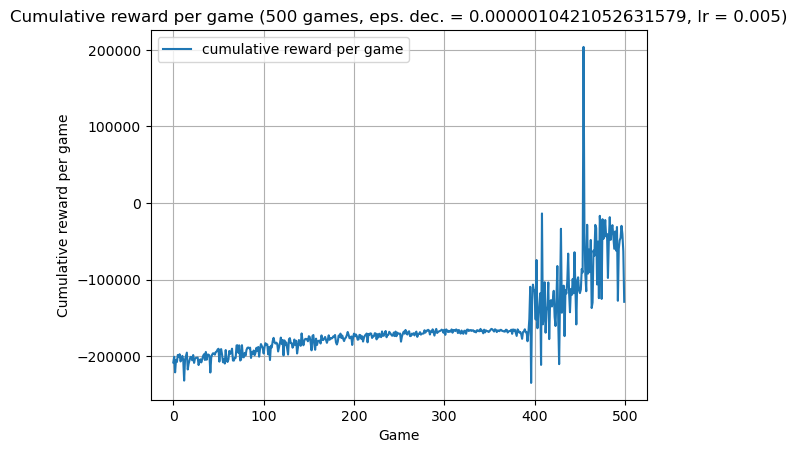

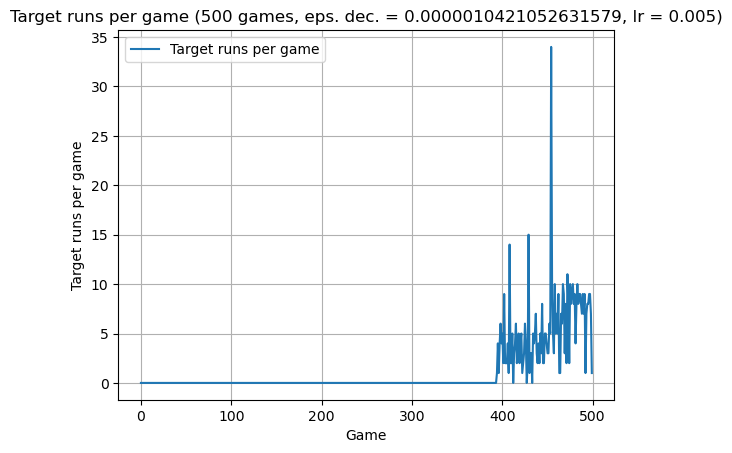

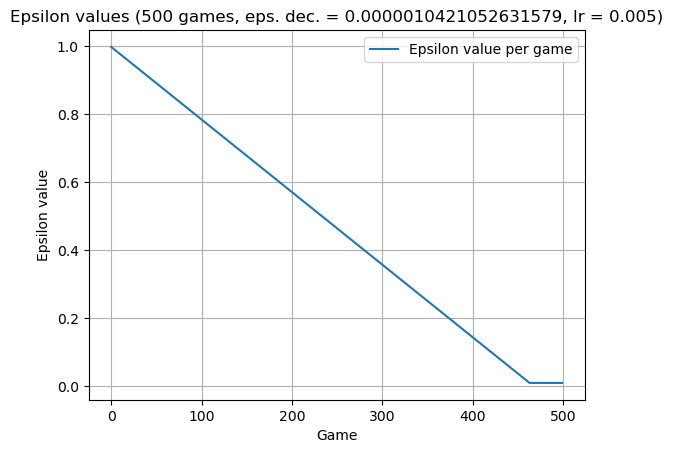

In [11]:
#Importing modules
import gym
import numpy as np
import matplotlib.pyplot as plt

#Relevant parameters:

p_epsilon = 1.0
p_gamma = 0.99
p_batch_size = 64
p_n_actions = 3
p_eps_end = 0.01
p_input_dims = [128]
p_learning_rate = 0.005


#Creating the environment and the agent
env = ClipReward(gym.make("ALE/Freeway-v5", difficulty = 1, mode = 3, obs_type = "ram"), -1000, 10000)
agent = Agent(gamma = p_gamma, epsilon = p_epsilon, batch_size = p_batch_size, n_actions = p_n_actions, eps_end = p_eps_end, input_dims = p_input_dims, lr = p_learning_rate)

#Creating lists for the cumulative reward, the epsilon history and the target runs
cum_reward_list, eps_history_list, target_runs_list = [], [], []
n_games = 500                                                       #Number of games
#max_cum_reward = [(3000/170) * (1 * 170 + 10000)] * n_games         #Maximum cumulative reward

for i in range(n_games):
    cum_reward = 0
    done = False
    #Recieving the first state
    observation = env.reset()[0]
    
    while not done:
        #Choose an action (after conversion from int to float values)
        action = agent.choose_action(np.float32(observation))

        #Recieving the new state, reward and termination information (cutting off unnecessary information)
        observation_, reward, done = env.step(action)[:3]

        #Updating the cumulative reward
        cum_reward += reward

        #Storing the transition
        agent.store_transition(observation, action, reward, observation_, done)

        #Getting the agent to learn
        agent.learn()

        #Updating the previous state
        observation = observation_
    
    #Recieving the number of target runs during the last game
    target_runs = ClipReward.get_TargetRuns(env)

    #Appending the cumulative reward, the epsilon history and the target runs
    cum_reward_list.append(cum_reward)
    eps_history_list.append(agent.epsilon)
    target_runs_list.append(target_runs)

    #Printing the most important information
    print('Episode: ', i, ', Cumulative reward: ', cum_reward, ', Epsilon: %.8f' % agent.epsilon, ', Target runs: ', target_runs)

    #Resetting the number of target runs
    ClipReward.reset_TargetRuns(env)

    #Saving models every 100 games (in case learning needs to be interrupted)
    if(i % 100 == 0):
        saving_path = 'C:\\Users\Jan Felix\Desktop\dqn_model\lest_episode'+ str(i) +'.pth'
        T.save(Agent.getModel(agent), saving_path)

#Saving the trained model
T.save(Agent.getModel(agent), 'C:\\Users\Jan Felix\Desktop\dqn_model\lest.pth')

#Plotting:
x = np.arange(0, n_games)
plt.plot(x, cum_reward_list, label = "cumulative reward per game")                           #Cummulative reward per game
#plt.plot(x, max_cum_reward, label = "maximum cumulative reward per game")                   #Maximum cummulative reward per game
plt.title(f"Cumulative reward per game ({n_games} games, eps. dec. = 0.0000010421052631579, lr = {p_learning_rate})")
plt.xlabel("Game")
plt.ylabel("Cumulative reward per game")
plt.legend()
plt.grid()
plt.show()

plt.plot(x, target_runs_list, label = "Target runs per game")                               #amount of target runs
plt.title(f"Target runs per game ({n_games} games, eps. dec. = 0.0000010421052631579, lr = {p_learning_rate})")
plt.xlabel("Game")
plt.ylabel("Target runs per game")
plt.legend()
plt.grid()
plt.show()

plt.plot(x, eps_history_list, label = "Epsilon value per game")                             #amount of target runs
plt.title(f"Epsilon values ({n_games} games, eps. dec. = 0.0000010421052631579, lr = {p_learning_rate})")
plt.xlabel("Game")
plt.ylabel("Epsilon value")
plt.legend()
plt.grid()
plt.show()

Episode:  0 , Cumulative reward:  -278889.5 , Epsilon: 0.98881850 , Target runs:  0
Episode:  1 , Cumulative reward:  -249845.5 , Epsilon: 0.97755450 , Target runs:  0
Episode:  2 , Cumulative reward:  -302341.0 , Epsilon: 0.96629050 , Target runs:  0
Episode:  3 , Cumulative reward:  -249937.5 , Epsilon: 0.95502650 , Target runs:  0
Episode:  4 , Cumulative reward:  -241822.0 , Epsilon: 0.94376250 , Target runs:  0
Episode:  5 , Cumulative reward:  -242776.0 , Epsilon: 0.93249850 , Target runs:  0
Episode:  6 , Cumulative reward:  -240332.0 , Epsilon: 0.92123450 , Target runs:  0
Episode:  7 , Cumulative reward:  -251502.5 , Epsilon: 0.90997050 , Target runs:  0
Episode:  8 , Cumulative reward:  -258114.5 , Epsilon: 0.89870650 , Target runs:  0
Episode:  9 , Cumulative reward:  -232300.5 , Epsilon: 0.88744250 , Target runs:  0
Episode:  10 , Cumulative reward:  -231116.0 , Epsilon: 0.87617850 , Target runs:  0
Episode:  11 , Cumulative reward:  -238454.5 , Epsilon: 0.86491450 , Target

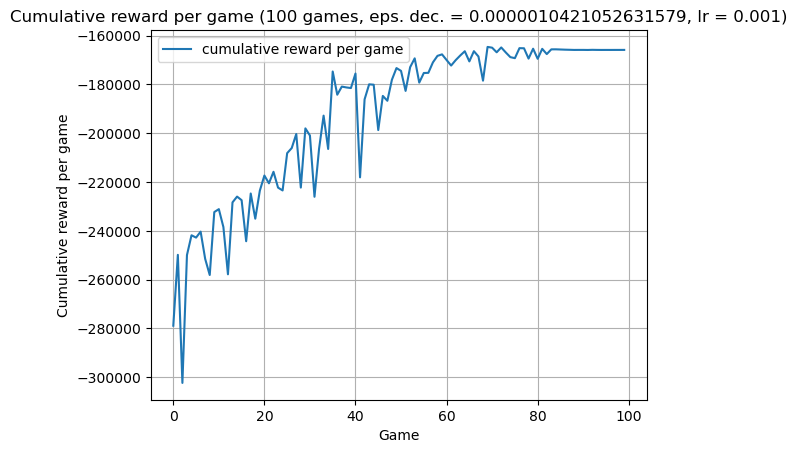

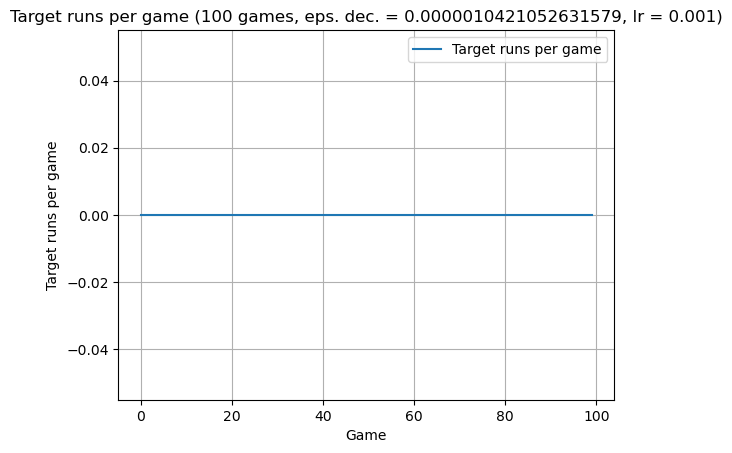

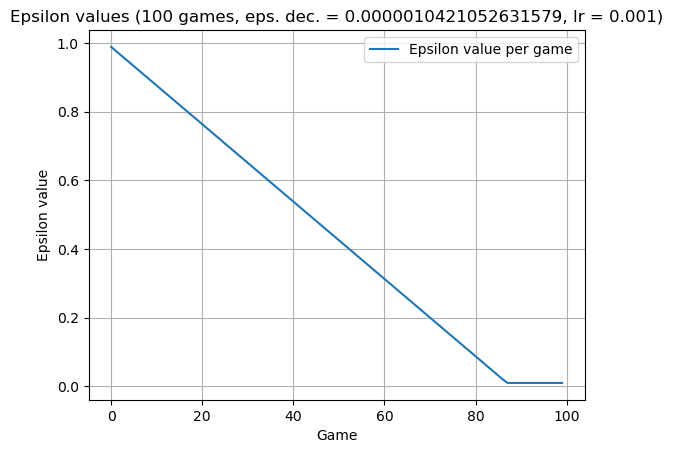

In [38]:
#Importing modules
import gym
import numpy as np
import matplotlib.pyplot as plt

#Relevant parameters:

p_epsilon = 1.0
p_gamma = 0.99
p_batch_size = 16
p_n_actions = 3
p_eps_end = 0.01
p_input_dims = [128]
p_learning_rate = 0.001


#Creating the environment and the agent
env = ClipReward(gym.make("ALE/Freeway-v5", difficulty = 1, mode = 3, obs_type = "ram"), -2000000000, 100000000)
agent = Agent(gamma = p_gamma, epsilon = p_epsilon, batch_size = p_batch_size, n_actions = p_n_actions, eps_end = p_eps_end, input_dims = p_input_dims, lr = p_learning_rate)

#Creating lists for the cumulative reward, the epsilon history and the target runs
cum_reward_list, eps_history_list, target_runs_list = [], [], []
n_games = 100                                                       #Number of games
#max_cum_reward = [(3000/170) * (1 * 170 + 10000)] * n_games         #Maximum cumulative reward

for i in range(n_games):
    cum_reward = 0
    done = False
    #Recieving the first state
    observation = env.reset()[0]
    
    while not done:
        #Choose an action (after conversion from int to float values)
        action = agent.choose_action(np.float32(observation))

        #Recieving the new state, reward and termination information (cutting off unnecessary information)
        observation_, reward, done = env.step(action)[:3]

        #Updating the cumulative reward
        cum_reward += reward

        #Storing the transition
        agent.store_transition(observation, action, reward, observation_, done)

        #Getting the agent to learn
        agent.learn()

        #Updating the previous state
        observation = observation_
    
    #Recieving the number of target runs during the last game
    target_runs = ClipReward.get_TargetRuns(env)

    #Appending the cumulative reward, the epsilon history and the target runs
    cum_reward_list.append(cum_reward)
    eps_history_list.append(agent.epsilon)
    target_runs_list.append(target_runs)

    #Printing the most important information
    print('Episode: ', i, ', Cumulative reward: ', cum_reward, ', Epsilon: %.8f' % agent.epsilon, ', Target runs: ', target_runs)

    #Resetting the number of target runs
    ClipReward.reset_TargetRuns(env)

    #Saving models every 100 games (in case learning needs to be interrupted)
    if(i % 100 == 0):
        saving_path = 'C:\\Users\Jan Felix\Desktop\dqn_model\ewlest_episode'+ str(i) +'.pth'
        T.save(Agent.getModel(agent), saving_path)

#Saving the trained model
T.save(Agent.getModel(agent), 'C:\\Users\Jan Felix\Desktop\dqn_model\ewlest.pth')

#Plotting:
x = np.arange(0, n_games)
plt.plot(x, cum_reward_list, label = "cumulative reward per game")                           #Cummulative reward per game
#plt.plot(x, max_cum_reward, label = "maximum cumulative reward per game")                   #Maximum cummulative reward per game
plt.title(f"Cumulative reward per game ({n_games} games, eps. dec. = 0.0000010421052631579, lr = {p_learning_rate})")
plt.xlabel("Game")
plt.ylabel("Cumulative reward per game")
plt.legend()
plt.grid()
plt.show()

plt.plot(x, target_runs_list, label = "Target runs per game")                               #amount of target runs
plt.title(f"Target runs per game ({n_games} games, eps. dec. = 0.0000010421052631579, lr = {p_learning_rate})")
plt.xlabel("Game")
plt.ylabel("Target runs per game")
plt.legend()
plt.grid()
plt.show()

plt.plot(x, eps_history_list, label = "Epsilon value per game")                             #amount of target runs
plt.title(f"Epsilon values ({n_games} games, eps. dec. = 0.0000010421052631579, lr = {p_learning_rate})")
plt.xlabel("Game")
plt.ylabel("Epsilon value")
plt.legend()
plt.grid()
plt.show()

#### X CNN X ####

After working on a first neural network during the first half of the semester, we are now going to split our group into the three individuals. Here, everyone is going to work on a more specific task. Simon is investigating the effects of limiting the RAM. Paul, on the other hand, will implement a CNN that uses a cropped rgb image as input. And I will also work on a CNN, but in contrast to Paul, my neural network is going to use an unprocessed grayscale image as input. In the final presentation of the course we will then compare our three approaches with the previously implemented DQN as well as Tobias modelbased approach and draw conclusions regarding our success.

In [6]:
class CNN(nn.Module):
    #Method to initialize the cnn
    def __init__(self, lr, dims_input, dims_conv1, dims_conv2, n_actions):
        #Inheritance: calling the constructor of the super class
        super(CNN, self).__init__()
        #Saving the given parameters
        self.lr = lr                                                #Learning rate
        self.dims_input = dims_input                                #Dimensions of the input
        self.dims_conv1 = dims_conv1                                #Dimensions of the first fully connected layer
        self.dims_conv2 = dims_conv2                                #Dimensions of the second fully connected layer
        self.n_actions = n_actions                                  #Number of possible actions

        #On each layer a linear transformation is applied
        self.conv1 = nn.Conv2d(1, 4, 5)
        self.pool1 = nn.MaxPool2d(3, 3)
        self.conv2 = nn.Conv2d(4, 8, 5)
        self.pool2 = nn.MaxPool2d(3, 3)
        self.fc1 = nn.Linear(8*16*16, 256)
        self.fc2 = nn.Linear(256, self.n_actions)

        #Setting up the optimization function which is using the adam algorithm
        #self.optimizer = optim.Adam(self.parameters(), lr = self.lr)
        
        #Setting up the Mean squared error loss function
        #self.loss = nn.MSELoss()

        #Choosing a GPU if possible
        self.device = T.device('cuda:0' if T.cuda.is_available() else 'cpu')
        self.to(self.device)

    #Method to calculate actions
    def forward(self, state):
        #Applying the activiation function (relu)
        x = self.pool1(F.relu(self.conv1(state)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = x.view(-1, 8 * 16, * 16)
        x = F.relu(self.fc1(x))

        #Only applied to the first two layers, not the output
        actions = F.softmax(self.fc2(x))

        #Returing
        return actions

    #Resize

In [114]:
env = gym.make("ALE/Freeway-v5", difficulty = 1, mode = 3, obs_type = "grayscale")
print(env.observation_space)
print(env.observation_space.shape)
sample = env.observation_space.sample()
print(len(sample))
print(len(sample[0]))
sample = T.tensor(sample)
sample = sample.view(1, 33600)
len(sample[0])

Box(0, 255, (210, 160), uint8)
(210, 160)
210
160


33600

In [33]:
class AgentCNN():
    #Method to initialize the agent
    def __init__(self, gamma, lr, epsilon, eps_dec, eps_end, dims_input, dims_fc1, dims_fc2, batch_size, max_mem_size, n_actions):
        #Saving the given parameters
        self.gamma = gamma                                             #Discount factor
        self.lr = lr                                                   #Learning rate        
        self.epsilon = epsilon                                         #Epsilon start value
        self.eps_dec = eps_dec                                         #Epsilon descent valze
        self.eps_end = eps_end                                         #Epsilon final value
        self.dims_input = dims_input                                   #Dimension of the input
        self.dims_fc1 = dims_fc1                                       #Dimension of the first fully connected layer
        self.dims_fc2 = dims_fc2                                       #Dimension of the second fully connected layer
        self.batch_size = batch_size                                   #Batch size
        self.max_mem_size = max_mem_size                               #Maximum memory size
        self.n_actions = n_actions                                     #Number of possible actions
        self.action_space = [i for i in range(n_actions)]              #Action space
        self.mem_counter = 0                                           #Counter for the memory
        self.runs = 0                                                  #Number of runs

        #Initializing our dqn (using two fully conected layers)
        self.Q_CNN = CNN(self.lr, self.dims_input, self.dims_fc1, self.dims_fc2, self.n_actions)

        #Initializing our memory (state, new state, action, reward & termination)
        self.state_memory = np.zeros((self.max_mem_size, self.dims_input), dtype = np.float32)
        self.new_state_memory = np.zeros((self.max_mem_size, self.dims_input), dtype = np.float32)
        self.action_memory = np.zeros(self.max_mem_size, dtype = np.int32)
        self.reward_memory = np.zeros(self.max_mem_size, dtype = np.float32)
        self.terminal_memory = np.zeros(self.max_mem_size, dtype = np.bool_)
    
    #Method to store a transition inside the memory
    """def store_transition(self, state, action, reward, state_, done):
        #Determining the storage index
        index = self.mem_counter % self.max_mem_size
        
        #Storing the given state, new state, reward, action and termination information
        self.state_memory[index] = state
        self.new_state_memory[index] = state_
        self.reward_memory[index] = reward
        self.action_memory[index] = action
        self.terminal_memory[index] = done

        #Increasing the memory counter by one
        self.mem_counter += 1"""
    
    #Method to preprocess the image used as input
    def preprocessing(self, image):
        input = image[24:185]
        input = T.tensor(image).view(33600)
        
        return input

    #Method to choose one of the previously calculated actions 
    def choose_action(self, observation):
        if np.random.random() > self.epsilon:
            #Exploitation
            state = self.preprocessing(observation).to(self.Q_CNN.device)
            print(state)
            print("-----------------")
            actions = self.Q_CNN.forward(state)
            #Choosing the best action (argmax returns the index of the highest value)
            action = T.argmax(actions).item()
        else:
            #Exploration (choosing a random action)
            action = np.random.choice(self.action_space)

        #Returning the selected actions
        return action

    #Method to let the agent learn
    """def learn(self):
        if self.mem_counter < self.batch_size:
            #Since the batch is empty at the beginning, we are filling it before the agent starts to learn 
            return
        
        #Setting the gradients of the optimized tensors to zero (Otherwise these are cumulated by pytorch)
        self.Q_eval.optimizer.zero_grad()

        #Getting the highest memory index we can reach
        max_mem = min(self.mem_counter, self.max_mem_size)

        #Choosing a random memory entry (as many times as a batch is big)
        batch = np.random.choice(max_mem, self.batch_size, replace = False)

        #Creating an array with the batch_size in order to slice the calculated values for the actions
        batch_index = np.arange(self.batch_size, dtype = np.int32)

        #Getting the states, new states, rewards, actions and termination information for the batch
        state_batch = T.tensor(self.state_memory[batch]).to(self.Q_eval.device)
        new_state_batch = T.tensor(self.new_state_memory[batch]).to(self.Q_eval.device)
        reward_batch = T.tensor(self.reward_memory[batch]).to(self.Q_eval.device)
        action_batch = self.action_memory[batch]                                            #This is not a tensor since we need it for slicing later
        terminal_batch = T.tensor(self.terminal_memory[batch]).to(self.Q_eval.device)

        #Calculating the estimate during the previous state
        #Additional slicing in order to get the estimate for the action the agent selected 
        q_eval = self.Q_eval.forward(state_batch)[batch_index, action_batch]                #The estimates for the actions the agent took
        #Calculating the estimate for the next state
        q_next = self.Q_eval.forward(new_state_batch)
        #Setting values of terminal states to zero (there are no next states after the game finished)
        q_next[terminal_batch] = 0.0
        #Calculating the target values
        q_target = reward_batch + self.gamma * T.max(q_next, dim = 1)[0]
        
        #Calculating the loss (mean squared error)
        loss = self.Q_eval.loss(q_target, q_eval).to(self.Q_eval.device)
        #Perfoming backpropagation
        loss.backward()
        #Updating (optimizing) the parameters 
        self.Q_eval.optimizer.step()

        #Increasing the number of runs
        self.runs += 1"""

    #Method to recieve a model
    def getModel(self):
        return self.Q_CNN

    #Method to set a trained model
    def setModel(self, path):
        self.Q_CNN = T.load(path)

    #Method to decrease the epsilon value
    def decreaseEpsilon(self):
        self.epsilon = self.epsilon - self.eps_dec if self.epsilon > self.eps_end else self.eps_end

In [36]:
#Setting all relevant parameters for the dqn:
p_epsilon = 1.0                     #Epsilon start value
p_eps_dec = 0.002                   #Epsilon descent value
p_eps_end = 0.05                    #Epsilon final value
p_lr = 0.003                        #Learning rate
p_gamma = 0.95                      #Discount factor 
p_dims_input = 128                  #Dimension of the input
p_dims_fc1 = 256                    #Dimension of the first fully connected layer
p_dims_fc2 = 256                    #Dimension of the second fully connected layer
p_batch_size = 16                   #Batch size
p_max_mem_size = 100000             #Maximum memory size
p_n_actions = 3                     #Number of possible actions
p_n_games = 500                     #Number of games
p_max_reward = 10000000             #Maximum reward
p_min_reward = -10000000            #Minimum reward

#Creating the environment and the agent
env = ClipReward(gym.make("ALE/Freeway-v5", difficulty = 1, mode = 3, obs_type = "grayscale"), p_min_reward, p_max_reward)
agent = AgentCNN(p_gamma, p_lr, p_epsilon, p_eps_dec, p_eps_end, p_dims_input, p_dims_fc1, p_dims_fc2, p_batch_size, p_max_mem_size, p_n_actions)

#Creating lists for the cumulative reward, the epsilon history and the target runs
cum_reward_list, eps_history_list, target_runs_list = [], [], []

for i in range(p_n_games):
    cum_reward = 0
    done = False

    #Recieving the first state
    observation = env.reset()[0]

    print(observation)

    while not done:
        #Choose an action (after conversion from int to float values)
        #action = agent.choose_action(np.float32(observation))

        #Recieving the new state, reward and termination information (cutting off unnecessary information)
        observation_, reward, done = env.step(action)[:3]

        #Updating the cumulative reward
        cum_reward += reward

        #Storing the transition
        #agent.store_transition(observation, action, reward, observation_, done)

        #Getting the agent to learn
        #agent.learn()

        #Updating the previous state
        observation = observation_

    #Recieving the number of target runs during the last game
    target_runs = ClipReward.get_TargetRuns(env)

    #Appending the cumulative reward, the epsilon history and the target runs
    cum_reward_list.append(cum_reward)
    eps_history_list.append(agent.epsilon)
    target_runs_list.append(target_runs)

    #Printing the most important information
    print('Episode: ', i, ', Cumulative reward: ', cum_reward, ', Epsilon: %.8f' % agent.epsilon, ', Target runs: ', target_runs)

    #Resetting the number of target runs
    ClipReward.reset_TargetRuns(env)

    #Updating epsilon
    AgentCNN.decreaseEpsilon(agent)

    #Saving models every 100 games (in case learning needs to be interrupted)
    if(i % 100 == 0):
        saving_path = 'C:\\Users\Jan Felix\Desktop\dqn_model\wewlest_episode'+ str(i) +'.pth'
        T.save(AgentCNN.getModel(agent), saving_path)
 
#Saving the trained model
T.save(AgentCNN.getModel(agent), 'C:\\Users\Jan Felix\Desktop\dqn_model\wewlest.pth')

#Results and plotting:
print('----------------------------------------------------------------------------')
print(f"""In this run we used the follwing parameters:
    Epsilon start value: {p_epsilon}
    Epsilon descent value: {p_eps_dec}
    Epsilon final value: {p_eps_end}
    Learning rate: {p_lr}
    Discount factor: {p_gamma}
    Dimension of the input: {p_dims_input}
    Dimension of the first fully connected layer: {p_dims_fc1}
    Dimension of the second fully connected layer: {p_dims_fc2}
    Batch size: {p_batch_size}
    Maximum memory size: {p_max_mem_size}
    Number of possible actions: {p_n_actions}
    Number of games: {p_n_games}
    Maximum reward: {p_max_reward}
    Minimum reward: {p_min_reward}"""
)

x = np.arange(0, p_n_games)
plt.plot(x, cum_reward_list, label = "cumulative reward per game")                          #Cumulative reward per game
plt.title(f"Cumulative reward per game ({p_n_games} games, eps. dec. = {p_eps_dec}, lr = {p_lr})")
plt.xlabel("Game")
plt.ylabel("Cumulative reward per game")
plt.legend()
plt.grid()
plt.show()

plt.plot(x, target_runs_list, label = "Target runs per game")                               #Amount of target runs
plt.title(f"Target runs per game ({p_n_games} games, eps. dec. = {p_eps_dec}, lr = {p_lr})")
plt.xlabel("Game")
plt.ylabel("Target runs per game")
plt.legend()
plt.grid()
plt.show()

plt.plot(x, eps_history_list, label = "Epsilon value per game")                             #Epsilon history
plt.title(f"Epsilon values ({p_n_games} games, eps. dec. = {p_eps_dec}, lr = {p_lr})")
plt.xlabel("Game")
plt.ylabel("Epsilon value")
plt.legend()
plt.grid()
plt.show()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Episode:  0 , Cumulative reward:  28132.0 , Epsilon: 1.00000000 , Target runs:  12
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Episode:  1 , Cumulative reward:  28126.0 , Epsilon: 0.99800000 , Target runs:  12
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Episode:  2 , Cumulative reward:  -109019.5 , Epsilon: 0.99600000 , Target runs:  0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Episode:  3 , Cumulative reward:  28126.0 , Epsilon: 0.99400000 , Target runs:  12
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Episode:  4 , Cumulative reward:  28126.0 , Epsilon: 0.99200000 , T

KeyboardInterrupt: 

In [77]:
import gym
import random
import time

#Creating the environment
env = gym.make("ALE/Asteroids-v5", difficulty = 0, mode = 0, obs_type = "rgb", render_mode = "ansi")

#Resetting the environment
observation1 = env.reset()[0]
terminated = False

print(observation)

while(not terminated):
    #Choosing a random number between 0 and 1
    rand_number = random.random()

    if(rand_number < 0.9):
        #Moving forwards
        random_action = 1
    elif(rand_number < 0.97):
        #Moving backwards
        random_action = 2
    else:
        #Standing still
        random_action = 0

    #Recieving information
    action = env.action_space.sample()
    observation2, reward, terminated, truncated, info = env.step(action)

    #Render the environment
    env.render()

env.close()
if((observation1 == observation2).all):
    print("yes")
print("no")

c:\Users\Jan Felix\anaconda3\lib\site-packages\gym\envs\registration.py:623: UserWarning: WARN: The environment is being initialised with mode (ansi) that is not in the possible render_modes (['human', 'rgb_array']).
  logger.warn(


Error: Render mode ansi not supported (rgb_array, human).

In [84]:
env = gym.make("ALE/Asteroids-v5", difficulty = 0, mode = 0, obs_type = "rgb", frameskip = 1, render_mode = "rgb_array")
env.reset()
env.step(1)
env.step(1)
env.step(1)
env.step(1)
env.step(1)

print(env.step(1))


(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 0.0, False, False, {'lives': 4, 'episode_frame_number': 6, 'frame_number': 6})
